<a href="https://colab.research.google.com/github/JF11579/New-Stuff/blob/main/NAR_slide_deck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Slides 

# Options

In [8]:
options(scipen=999)

options(repr.plot.width=14, repr.plot.height=10)

# Packages

In [9]:
install.packages('zoo')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [30]:
install.packages('ggthemes')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [168]:
library(tidyverse)
library(ggplot2)
library(lubridate)
library(zoo)
library(scales)
library(ggthemes)
library(tibble)
library(ggpmisc)
library(lubridate)


# Quarterly GDP Line Graph

## Import Data

Suggested Citation:
U.S. Bureau of Economic Analysis, Gross Domestic Product [GDP], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDP, May 16, 2021.

In [ ]:
# https://fred.stlouisfed.org/series/GDP

# Does not say if it is current or 2012 dollars

GDP_Qtrly<- read.csv("/content/GDP_Qtrly_test.csv")
head(GDP_Qtrly)

,DATE,GDP,Trillions,Billions
,<chr>,<dbl>,<dbl>,<dbl>
1,2018-01-01,20242.22,20.24222,20242215000000
2,2018-02-01,20243.22,20.24321,20243215000000
3,2018-03-01,20244.22,20.24422,20244215000000
4,2018-04-01,20552.65,20.55265,20552653000000
5,2018-05-01,20553.65,20.55365,20553653000000
6,2018-06-01,20554.65,20.55465,20554653000000


## Wrangle Data

  Convert to Data type

  Make Numbers easier to read. Decimals?

In [ ]:
GDP_Qtrly$DATE <- as.Date(GDP_Qtrly$DATE)

In [ ]:
head(GDP_Qtrly)

,DATE,GDP,Trillions,Billions
,<date>,<dbl>,<dbl>,<dbl>
1,2018-01-01,20242.22,20.24222,20242215000000
2,2018-02-01,20243.22,20.24321,20243215000000
3,2018-03-01,20244.22,20.24422,20244215000000
4,2018-04-01,20552.65,20.55265,20552653000000
5,2018-05-01,20553.65,20.55365,20553653000000
6,2018-06-01,20554.65,20.55465,20554653000000


Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


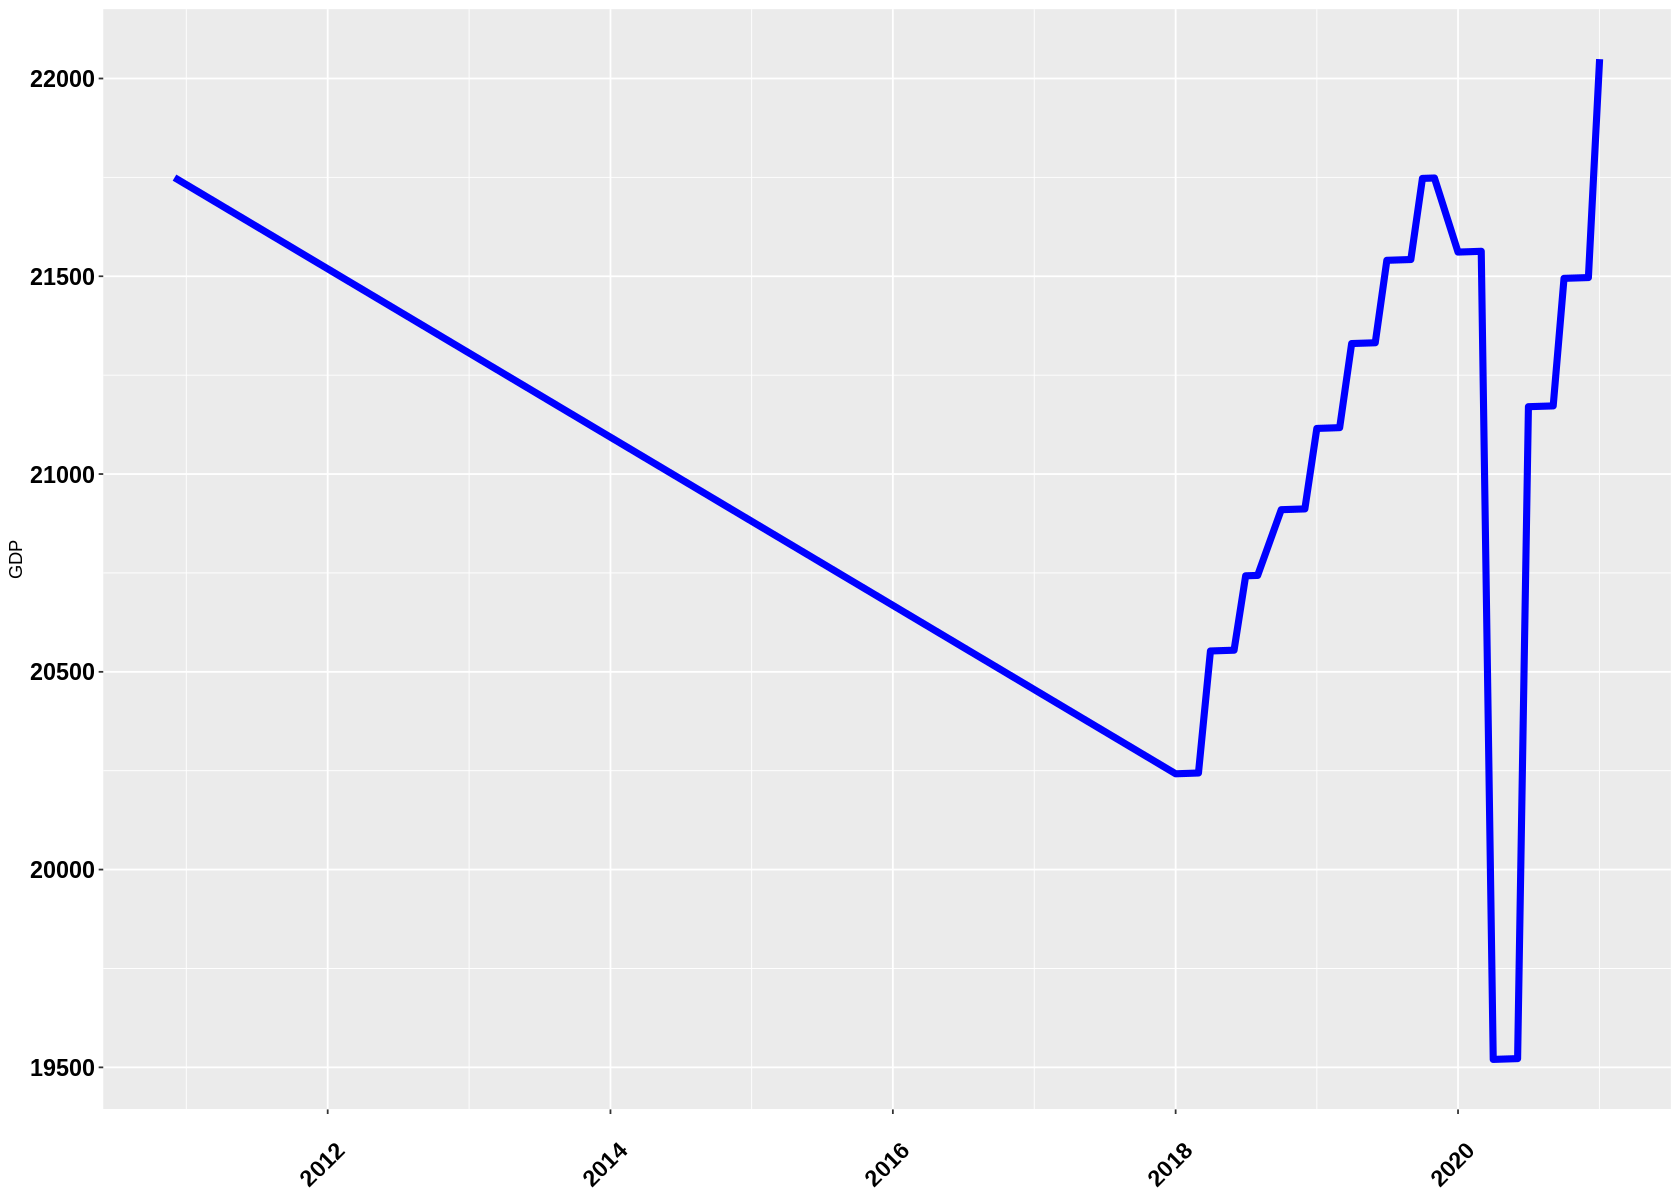

In [ ]:
Line_1 <- ggplot(data= GDP_Qtrly ,aes(x= DATE, y= GDP, color = "Blue"))+
  geom_line(color = 'blue', size = 2)+
  theme(axis.text.x = element_text(face="bold", color="black", 
                           size=14, angle=45,vjust = 0),
          axis.text.y = element_text(face="bold", color="black", 
                           size=14, angle=0))+
                           theme(axis.title.x = element_text(hjust = -20, vjust= -10))
Line_1  

Next change monthly to quarterly

SET Y axis to 0

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


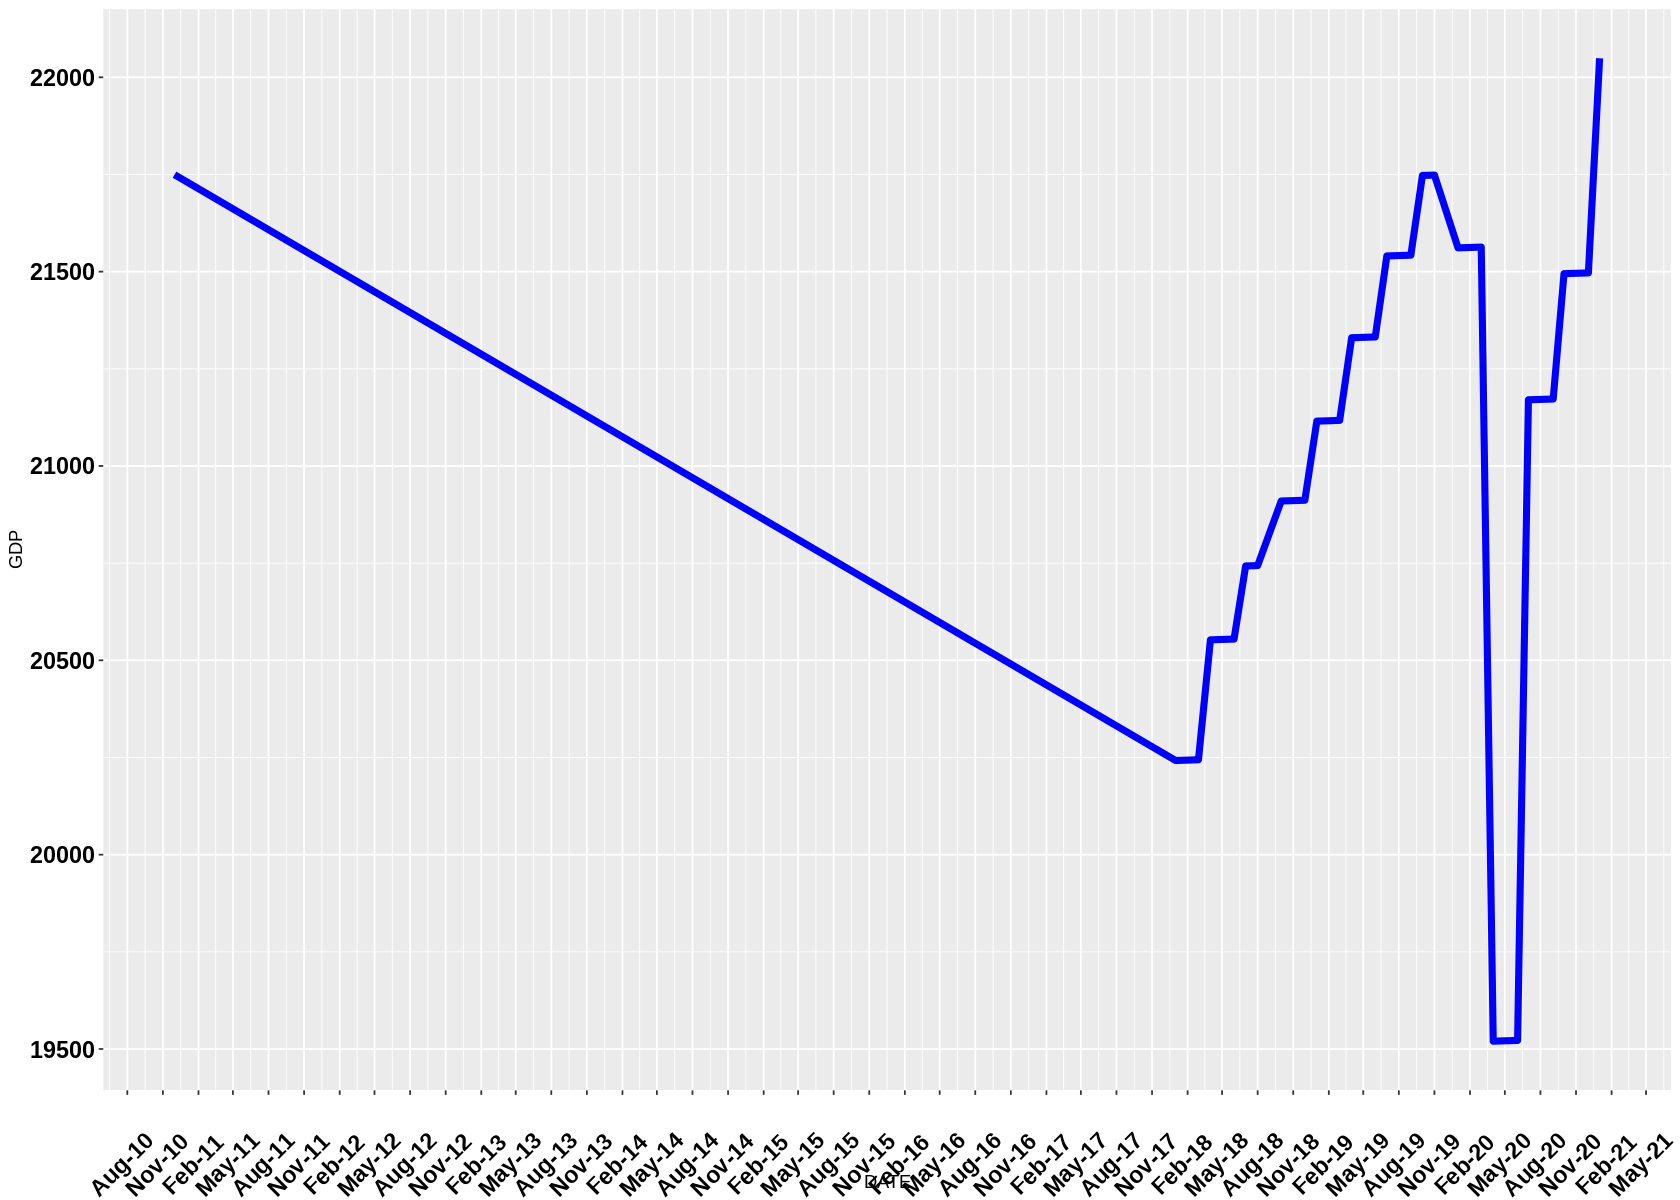

In [ ]:
Line_2 <- ggplot(data= GDP_Qtrly ,aes(x= DATE, y= GDP, color = "Blue"))+
  geom_line(color = 'blue', size = 2)+
  theme(axis.text.x = element_text(face="bold", color="black", 
                           size=14, angle=45,vjust = 0),
          axis.text.y = element_text(face="bold", color="black", 
                           size=14, angle=0))+
  scale_x_date(date_breaks = "3 months", date_labels = "%b-%y")

Line_2

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


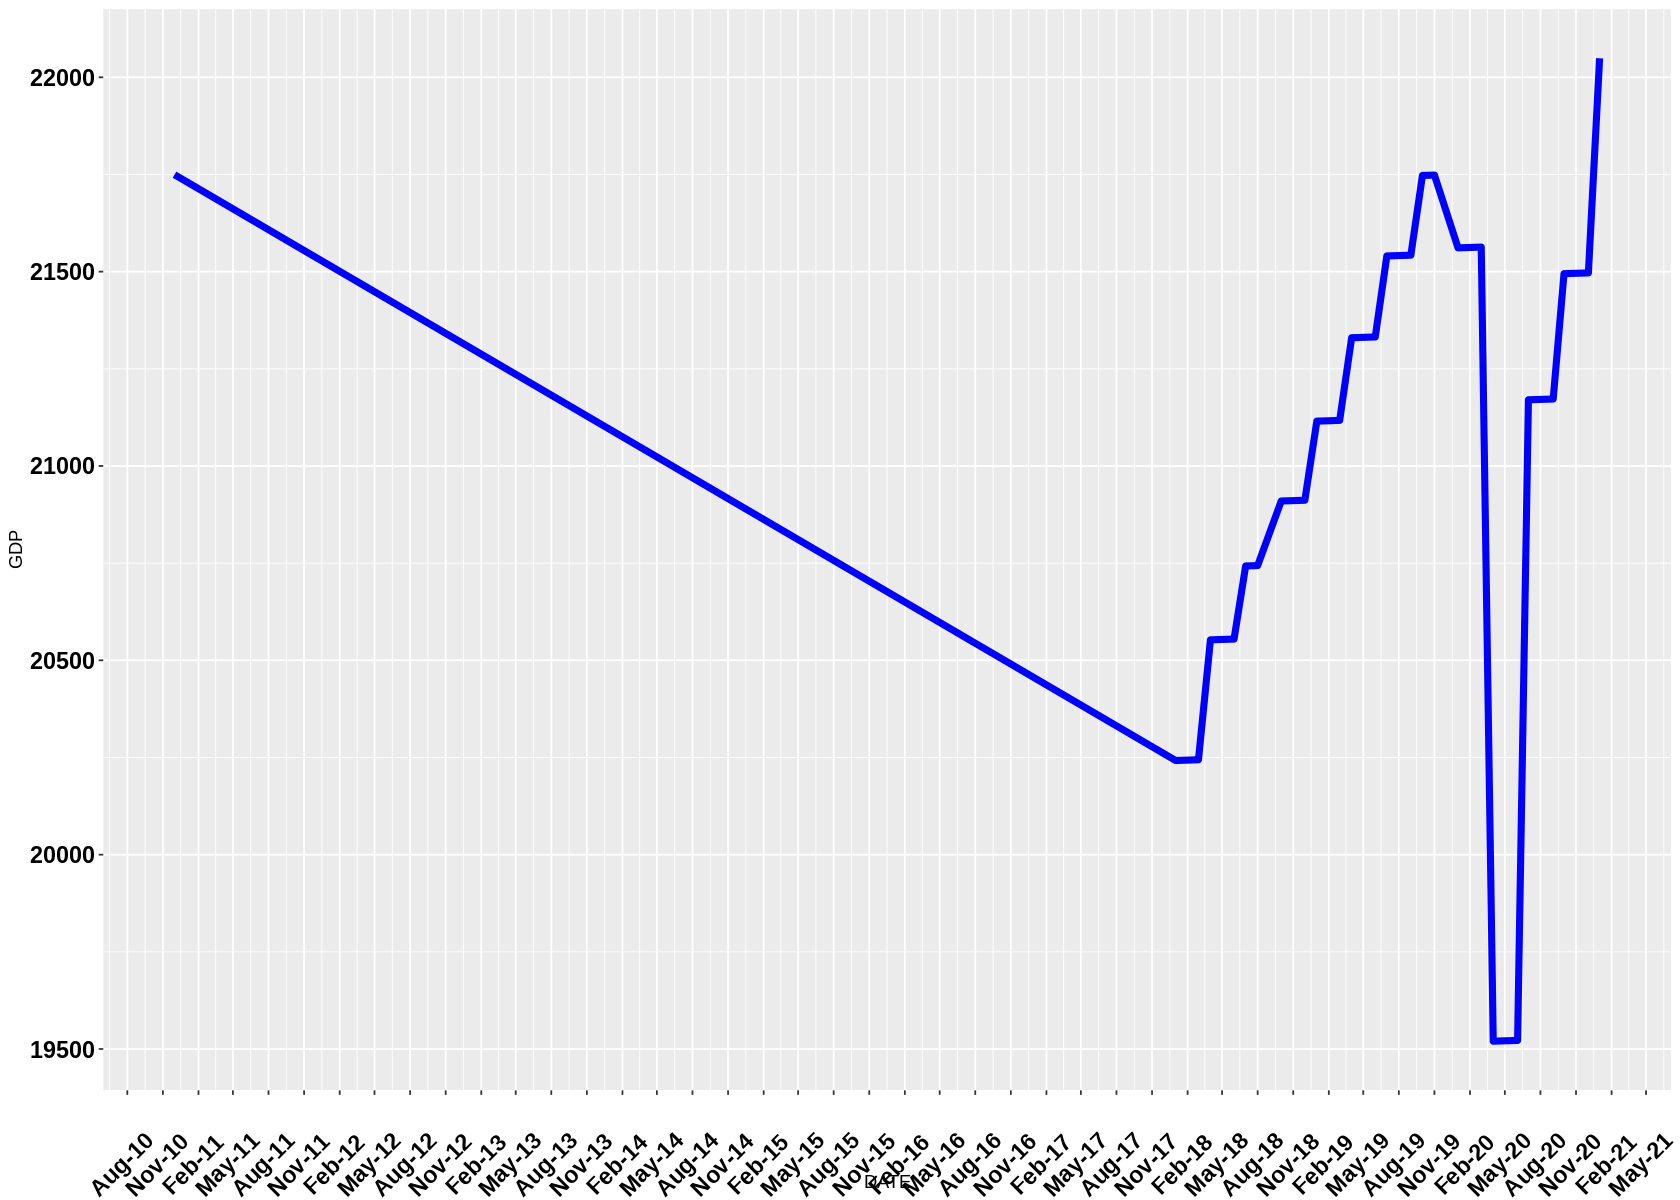

In [ ]:
Line_3 <- ggplot(data= GDP_Qtrly ,aes(x= DATE, y= GDP, color = "Blue"))+
  geom_line(color = 'blue', size = 2)+
  theme(axis.text.x = element_text(face="bold", color="black", 
                           size=14, angle=45,vjust = 0),
          axis.text.y = element_text(face="bold", color="black", 
                           size=14, angle=0))+
  scale_x_date(date_breaks = "3 months", date_labels = "%b-%y")

Line_3

In [ ]:
###############

In [11]:
GDP_4 <- read.csv("/content/GDP_Qtrly_3 - Sheet1.csv")
head(GDP_4)

,Date,Date_Qtr,GDP,Trillions,Billions
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-01,2017.4,20242.22,20.24222,20242215000000
2,2018-04-01,2018.1,20552.65,20.55265,20552653000000
3,2018-07-01,2018.2,20742.72,20.74272,20742723000000
4,2018-10-01,2018.3,20909.85,20.90985,20909853000000
5,2019-01-01,2018.4,21115.31,21.11531,21115309000000
6,2019-04-01,2019.1,21329.88,21.32988,21329877000000


In [17]:
#https://stackoverflow.com/questions/31198144/formatting-a-scale-x-continuous-axis-with-quarterly-data

make_date <- function(x) {
  year <- floor(x)
  x <- year + (x - year)/0.4 - 0.125
  as.Date(as.yearqtr(x))
}

format_quarters <- function(x) {
  x <- as.yearqtr(x)
  year <- as.integer(x)
  quart <- as.integer(format(x, "%q"))

  paste(c("Jan-Mar","Apr-Jun","Jul-Sep","Oct-Dec")[quart], 
        year)
}


ggplot(GDP_4, aes(x = make_date(Date_Qtr), y = GDP)) + 
  geom_line(aes(color = 'blue', size=0.8)) +
  scale_y_continuous("Number of things", 
                     limits=c(18000,24000)) +
  scale_x_date("Year and quarter when things were counted",
                     breaks = date_breaks("3 months"),
                     labels = format_quarters) +
  theme_bw() + 
  theme(axis.text.x = element_text(angle=45, vjust = 0.5),
        legend.title=element_blank(),
        legend.position = c(.4,0.85))

ERROR: ignored

In [ ]:
#https://stackoverflow.com/questions/31198144/formatting-a-scale-x-continuous-axis-with-quarterly-data

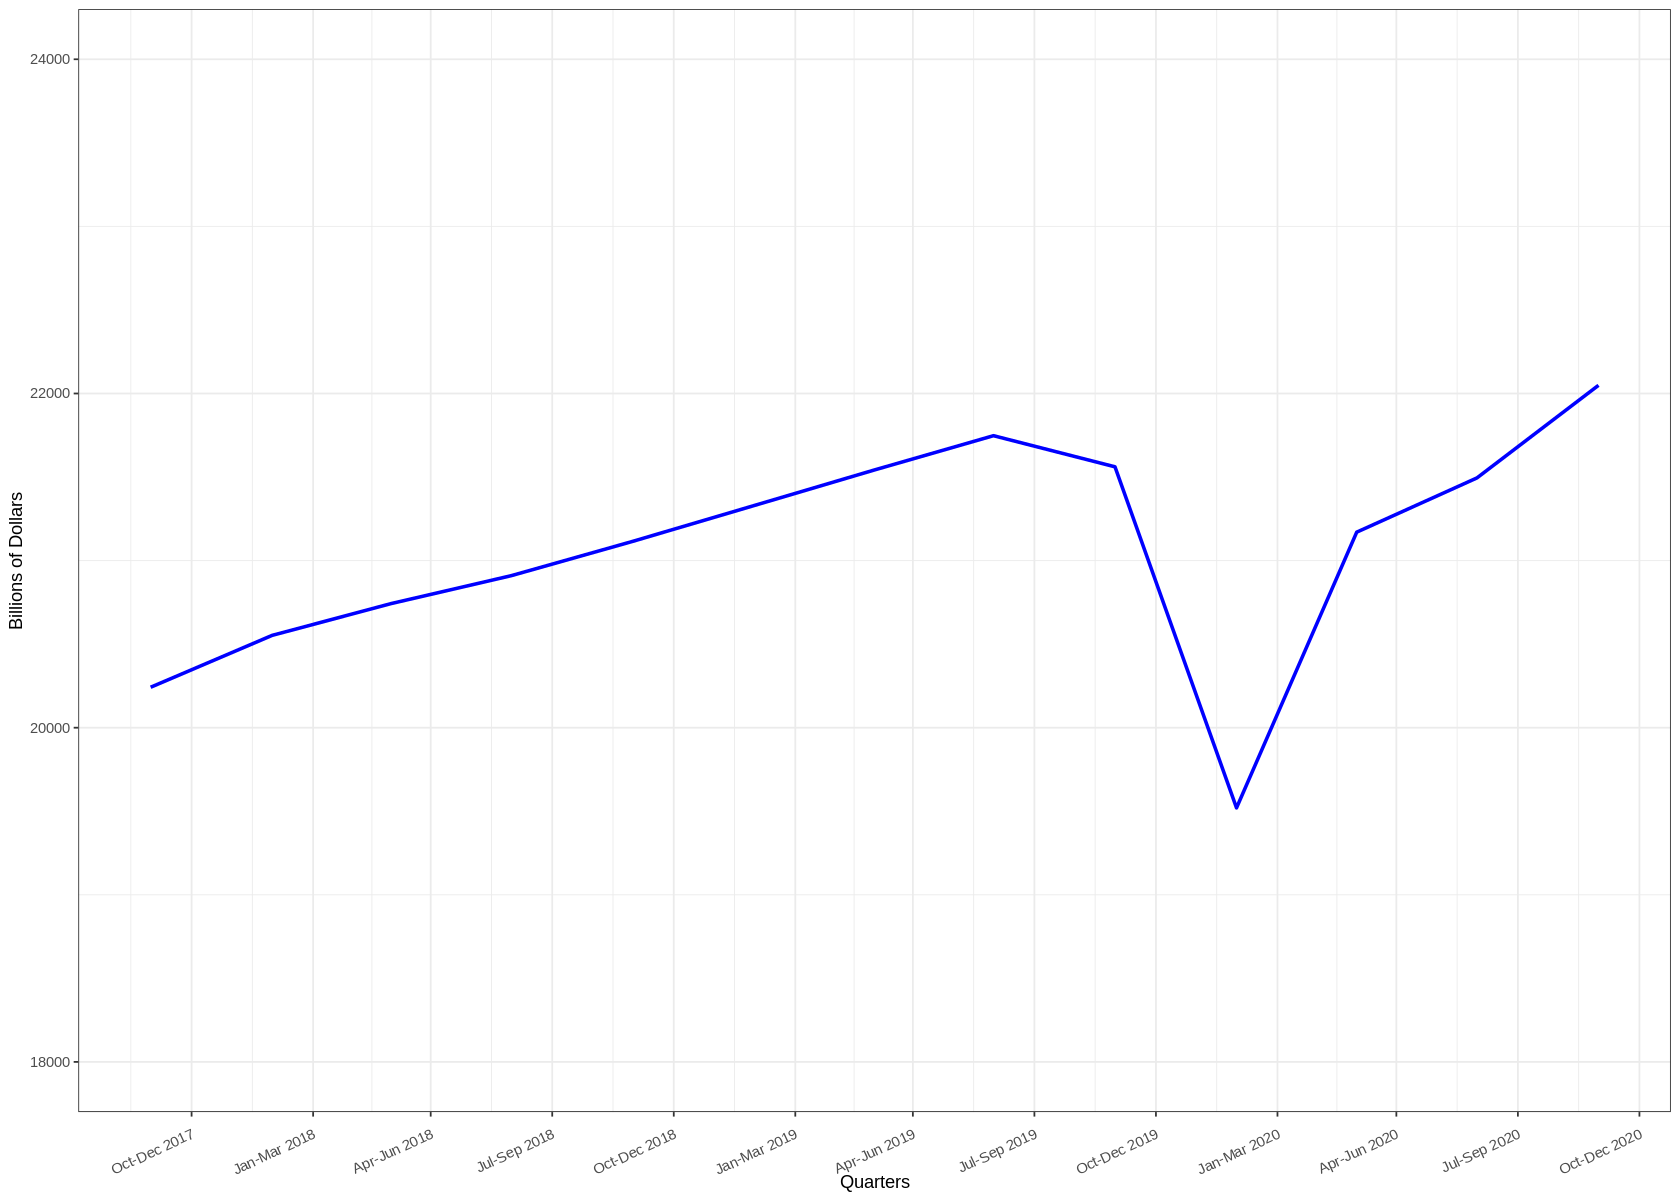

In [24]:
#https://stackoverflow.com/questions/31198144/formatting-a-scale-x-continuous-axis-with-quarterly-data
make_date <- function(x) {
  year <- floor(x)
  x <- year + (x - year)/0.4 - 0.125
  as.Date(as.yearqtr(x))
}

format_quarters <- function(x) {
  x <- as.yearqtr(x)
  year <- as.integer(x)
  quart <- as.integer(format(x, "%q"))

  paste(c("Jan-Mar","Apr-Jun","Jul-Sep","Oct-Dec")[quart], 
        year)
}


ggplot(GDP_4, aes(x = make_date(Date_Qtr), y = GDP)) + 
  geom_line(color = 'blue', size=1) +
  scale_y_continuous("Billions of Dollars", 
                     limits=c(18000,24000)) +
  scale_x_date("Quarters",
                     breaks = date_breaks("3 months"),
                     labels = format_quarters) +
  theme_bw() + 
  theme(axis.text.x = element_text(angle= 25
  , vjust = 0.8 ,hjust = 1),
        legend.title=element_blank(),
        legend.position = c(.4, 1))

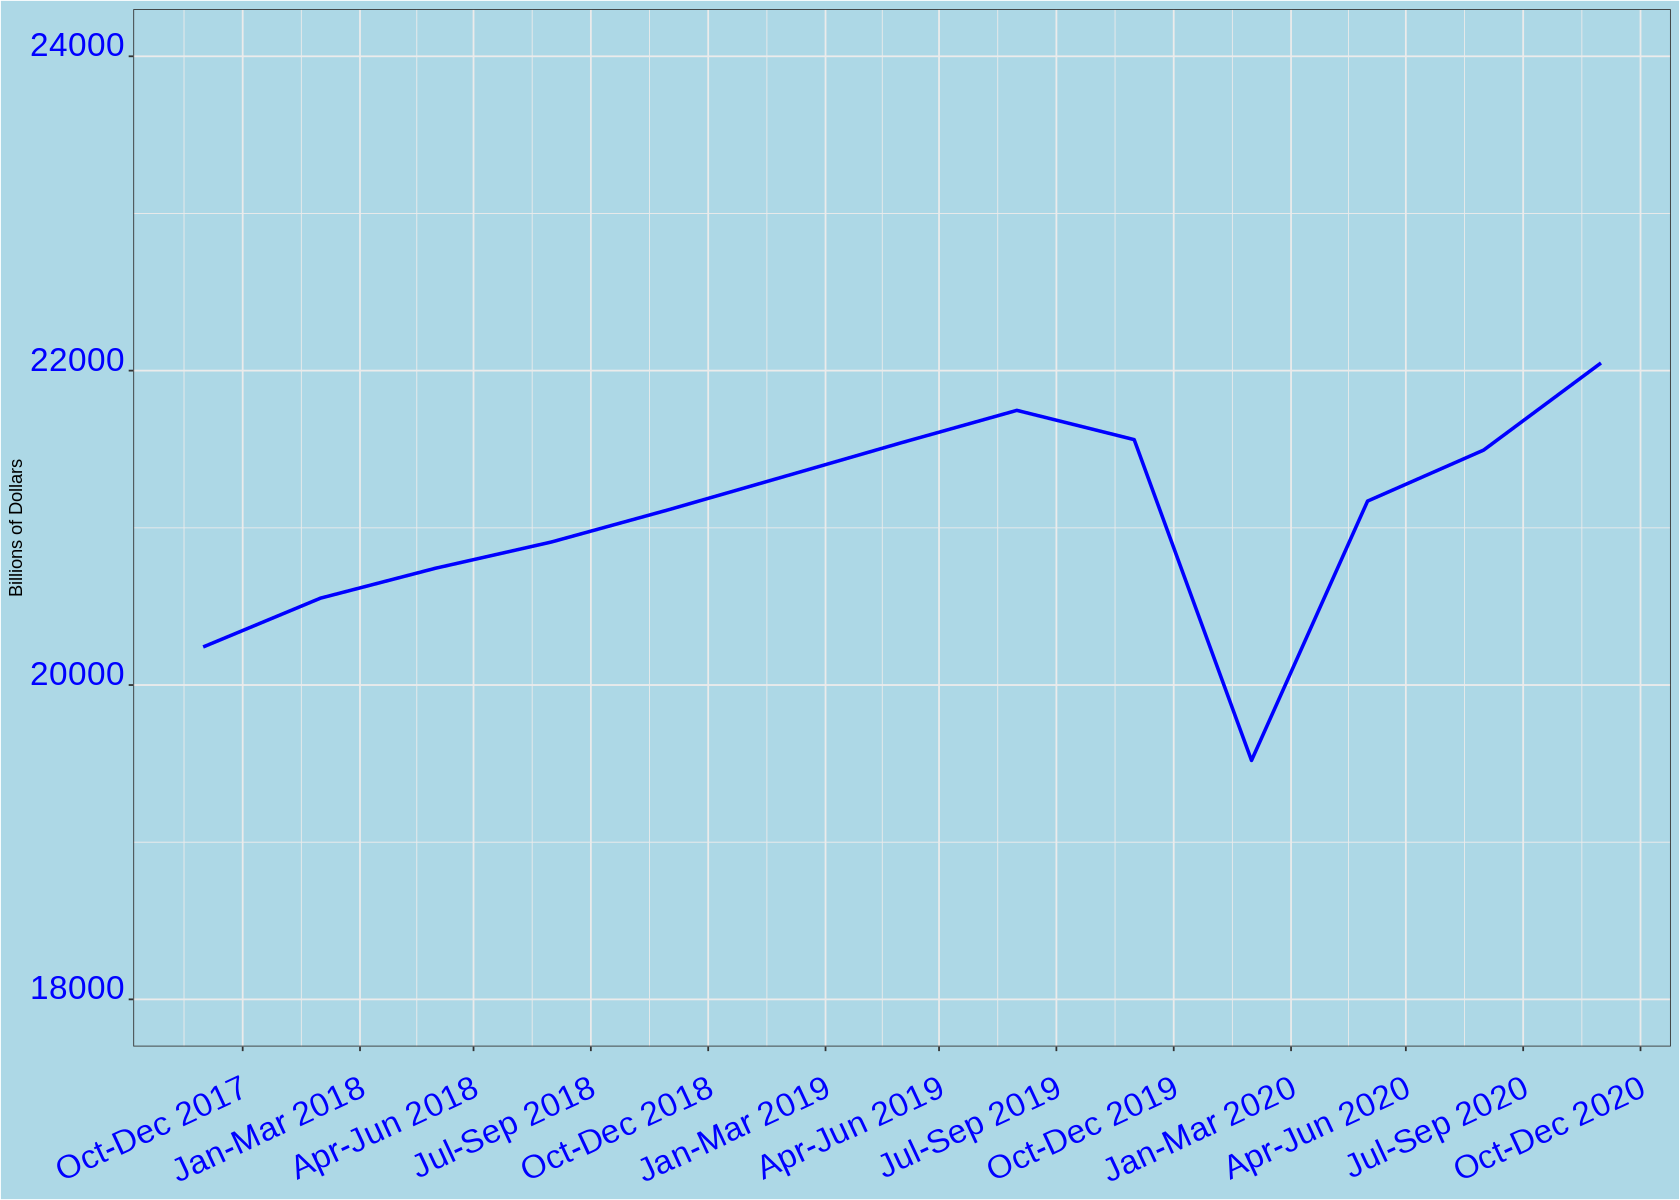

In [25]:
make_date <- function(x) {
  year <- floor(x)
  x <- year + (x - year)/0.4 - 0.125
  as.Date(as.yearqtr(x))
}

format_quarters <- function(x) {
  x <- as.yearqtr(x)
  year <- as.integer(x)
  quart <- as.integer(format(x, "%q"))

  paste(c("Jan-Mar","Apr-Jun","Jul-Sep","Oct-Dec")[quart], 
        year)
}


ggplot(GDP_4, aes(x = make_date(Date_Qtr), y = GDP)) + 
  geom_line(color = 'blue', size=1) +
  scale_y_continuous("Billions of Dollars", 
                     limits=c(18000,24000)) +
  scale_x_date("",
                     breaks = date_breaks("3 months"),
                     labels = format_quarters) +
  theme_bw() + 
  theme(axis.text.x = element_text(color = 'blue' ,size= 20,angle= 25
  , vjust = 0.8 ,hjust = 1),
        legend.title=element_blank(),
        legend.position = c(.4, 1) ,
        axis.text.y = element_text(color = "blue", size = 20, angle = 0, hjust = 1, vjust = 0, face = "plain"),  
        )+
        
                  theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue"))
       

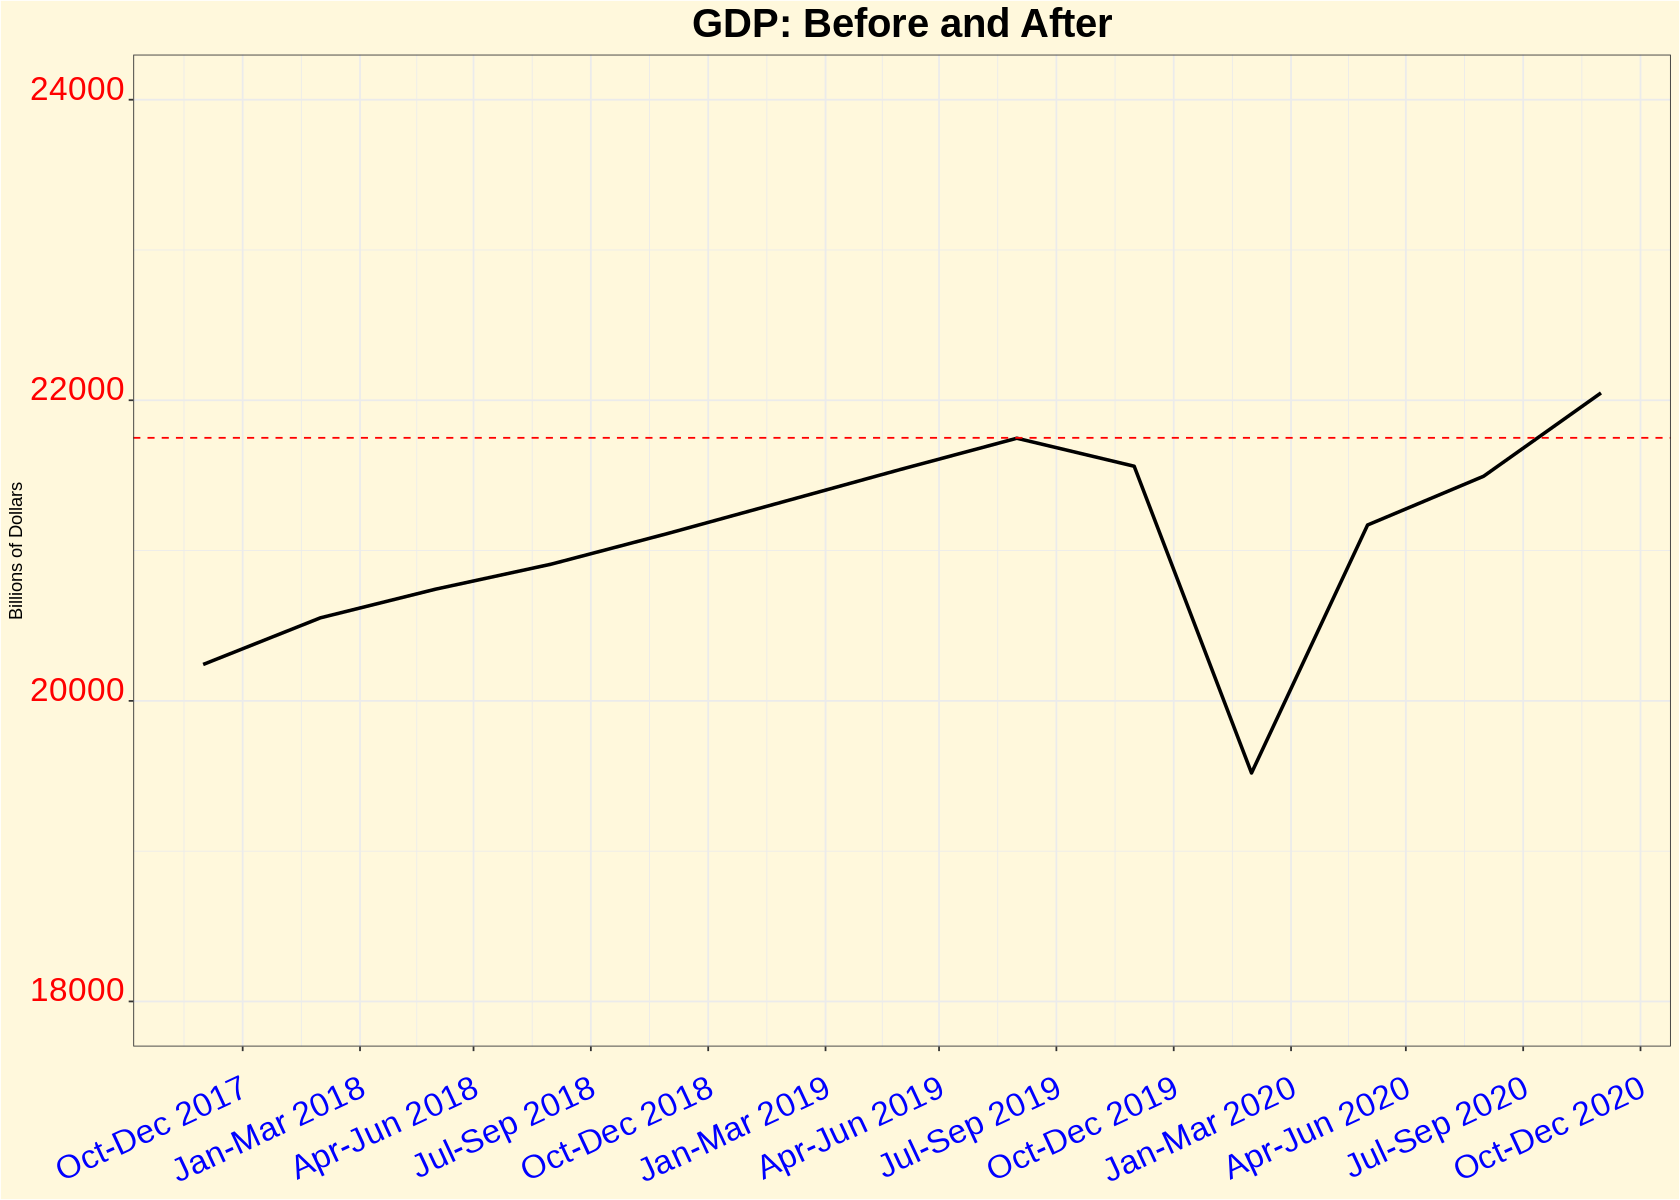

In [26]:
make_date <- function(x) {
  year <- floor(x)
  x <- year + (x - year)/0.4 - 0.125
  as.Date(as.yearqtr(x))
}

format_quarters <- function(x) {
  x <- as.yearqtr(x)
  year <- as.integer(x)
  quart <- as.integer(format(x, "%q"))

  paste(c("Jan-Mar","Apr-Jun","Jul-Sep","Oct-Dec")[quart], 
        year)
}


ggplot(GDP_4, aes(x = make_date(Date_Qtr), y = GDP)) + 
  geom_line(color = 'black', size=1) +
  scale_y_continuous("Billions of Dollars", 
                     limits=c(18000,24000)) +
  scale_x_date("",
                     breaks = date_breaks("3 months"),
                     labels = format_quarters) +
  theme_bw() + 
  theme(axis.text.x = element_text(color = 'blue' ,size= 20,angle= 25
  , vjust = 0.8 ,hjust = 1),
        legend.title=element_blank(),
        legend.position = c(.4, 1) ,
        axis.text.y = element_text(color = "red", size = 20, angle = 0, hjust = 1, vjust = 0, face = "plain"),  
        )+
        
                  theme(plot.background = element_rect(fill = "cornsilk"),
                      panel.background = element_rect(fill = "cornsilk"))+
        geom_hline(yintercept=21750, linetype="dashed", color = "red")+
        labs(title = "GDP: Before and After")+
  theme(plot.title = element_text(color = "black", size = 24, hjust = 0.5,lineheight = 0.9, face = "bold"))

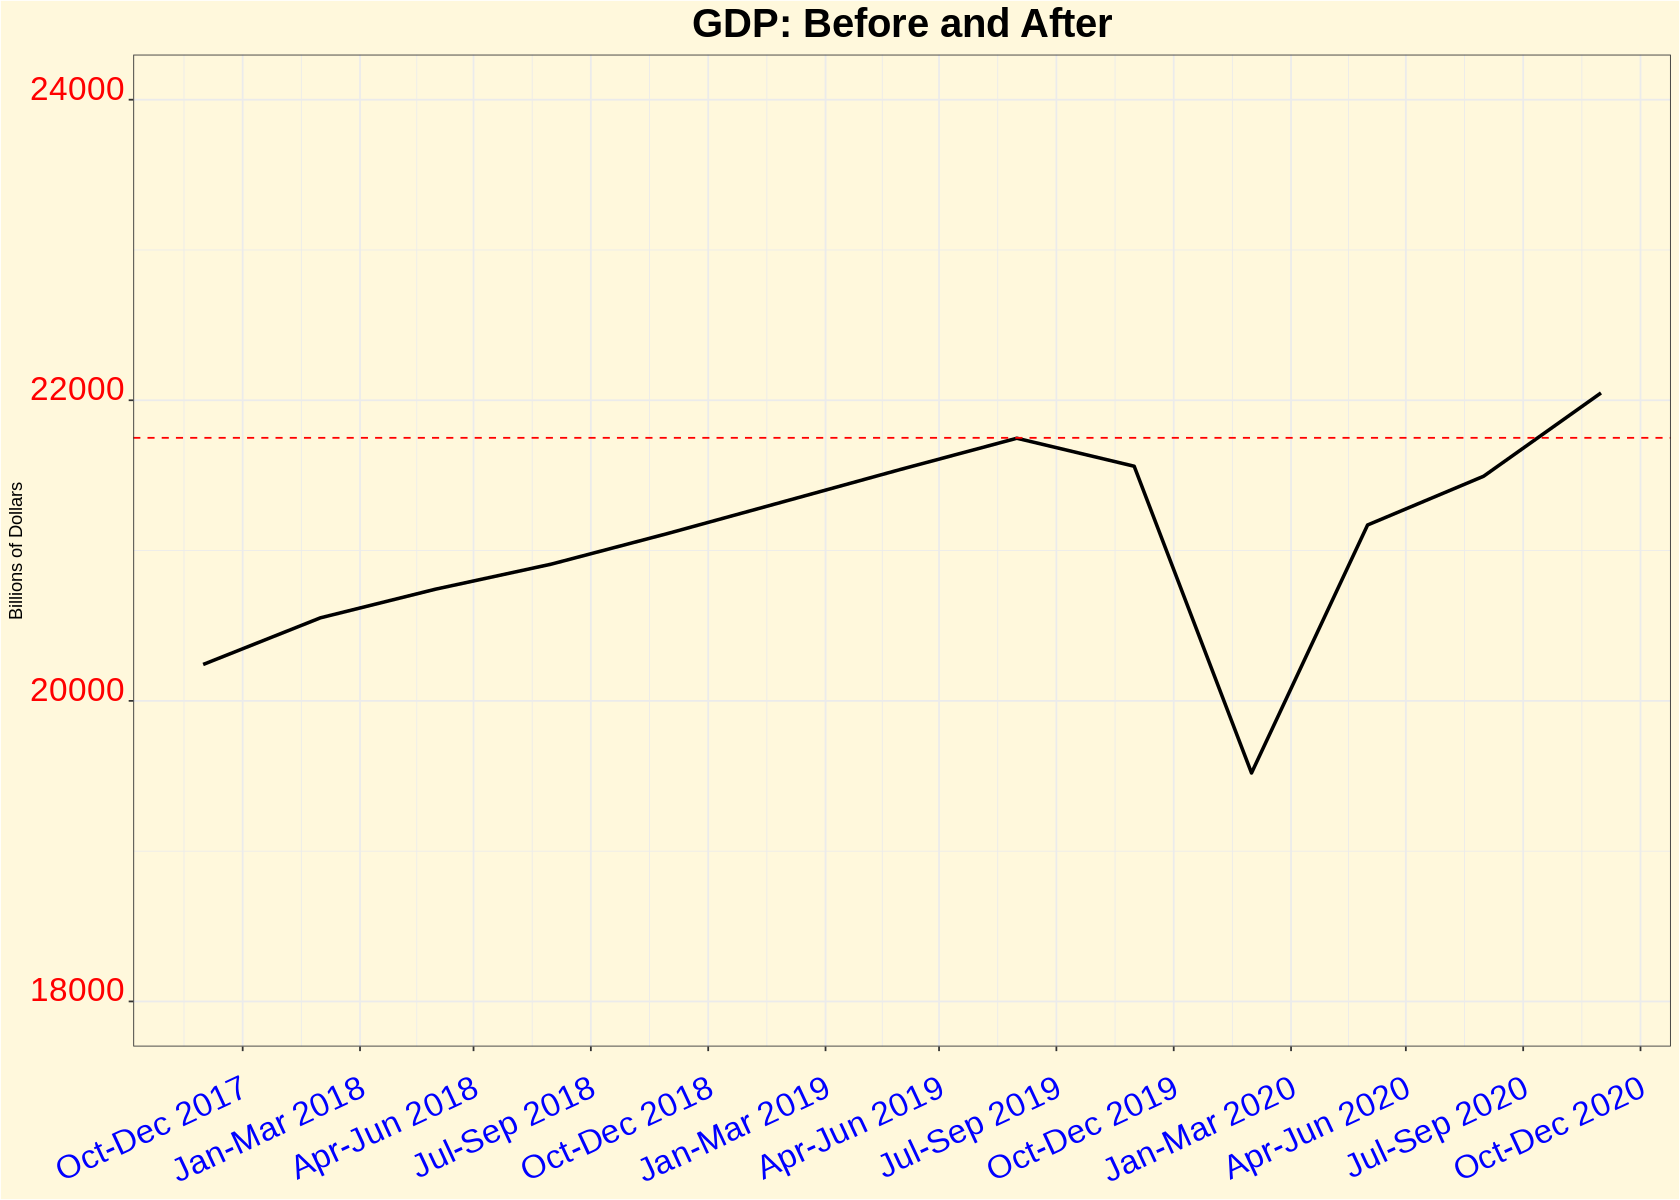

In [45]:
make_date <- function(x) {
  year <- floor(x)
  x <- year + (x - year)/0.4 - 0.125
  as.Date(as.yearqtr(x))
}

format_quarters <- function(x) {
  x <- as.yearqtr(x)
  year <- as.integer(x)
  quart <- as.integer(format(x, "%q"))

  paste(c("Jan-Mar","Apr-Jun","Jul-Sep","Oct-Dec")[quart], 
        year)
}


Cornsilk <-ggplot(GDP_4, aes(x = make_date(Date_Qtr), y = GDP)) + 
  geom_line(color = 'black', size=1) +
  scale_y_continuous("Billions of Dollars", 
                     limits=c(18000,24000)) +
  scale_x_date("",
                     breaks = date_breaks("3 months"),
                     labels = format_quarters) +
  theme_bw() + 
  theme(axis.text.x = element_text(color = 'blue' ,size= 20,angle= 25
  , vjust = 0.8 ,hjust = 1),
        legend.title=element_blank(),
        legend.position = c(.4, 1) ,
        axis.text.y = element_text(color = "red", size = 20, angle = 0, hjust = 1, vjust = 0, face = "plain"),  
        )+
        
                  theme(plot.background = element_rect(fill = "cornsilk"),
                      panel.background = element_rect(fill = "cornsilk"))+
        geom_hline(yintercept=21750, linetype="dashed", color = "red")+
        labs(title = "GDP: Before and After")+
  theme(plot.title = element_text(color = "black", size = 24, hjust = 0.5,lineheight = 0.9, face = "bold"))
Cornsilk

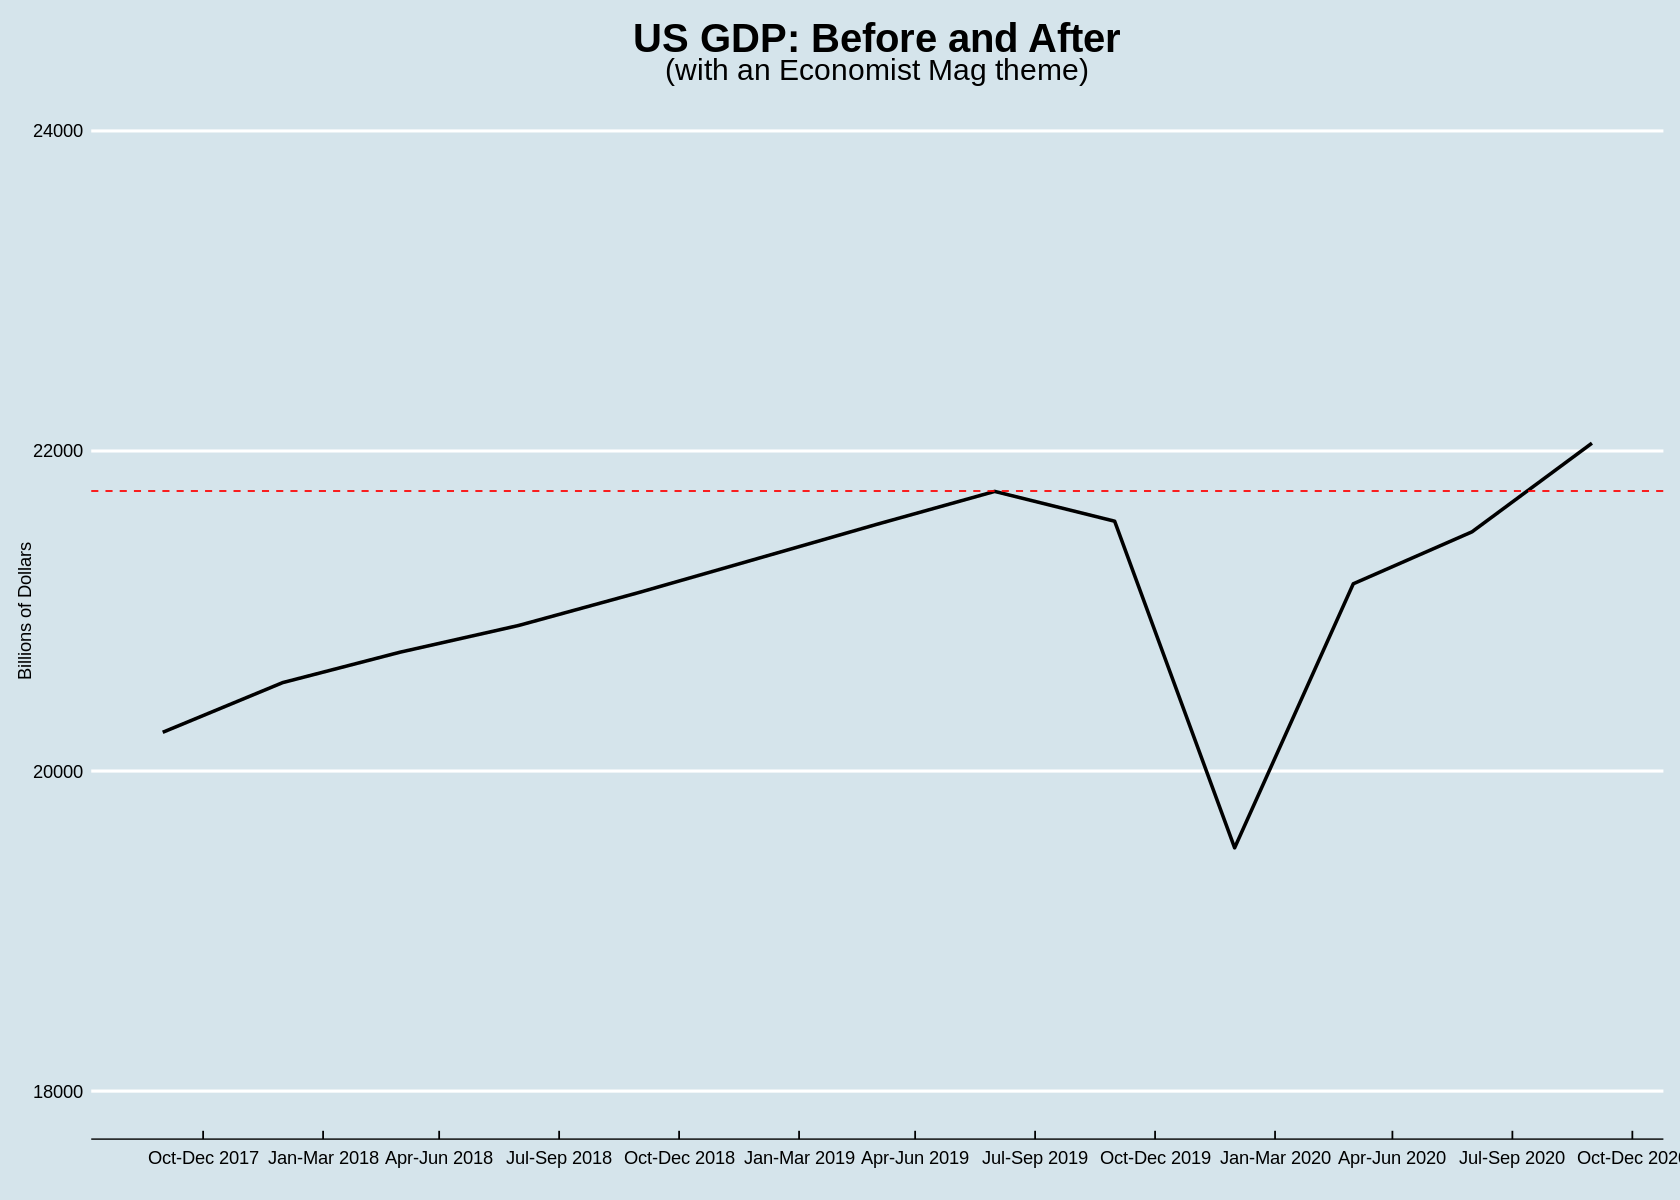

In [79]:
Economist <-ggplot(GDP_4, aes(x = make_date(Date_Qtr), y = GDP)) + 
  geom_line(color = 'black', size=1) +
  scale_y_continuous("Billions of Dollars", 
                     limits=c(18000,24000)) +
  scale_x_date("",
                     breaks = date_breaks("3 months"),
                     labels = format_quarters) +
  theme_bw() + 
  theme(axis.text.x = element_text(color = 'blue' ,size= 20,angle= 25
  , vjust = 0.8 ,hjust = 1),
        legend.title=element_blank(),
        legend.position = c(.4, 1) ,
        axis.text.y = element_text(color = "red", size = 20, angle = 0, hjust = 1, vjust = 0, face = "plain"),  
        )+  
        theme_economist()+
        geom_hline(yintercept=21750, linetype="dashed", color = "red")+
        labs(title = "US GDP: Before and After",
        subtitle='(with an Economist Mag theme)')+
  theme(plot.title = element_text(color = "black", size = 24, hjust = 0.5,lineheight = 0.9, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5,size = 18))

Economist

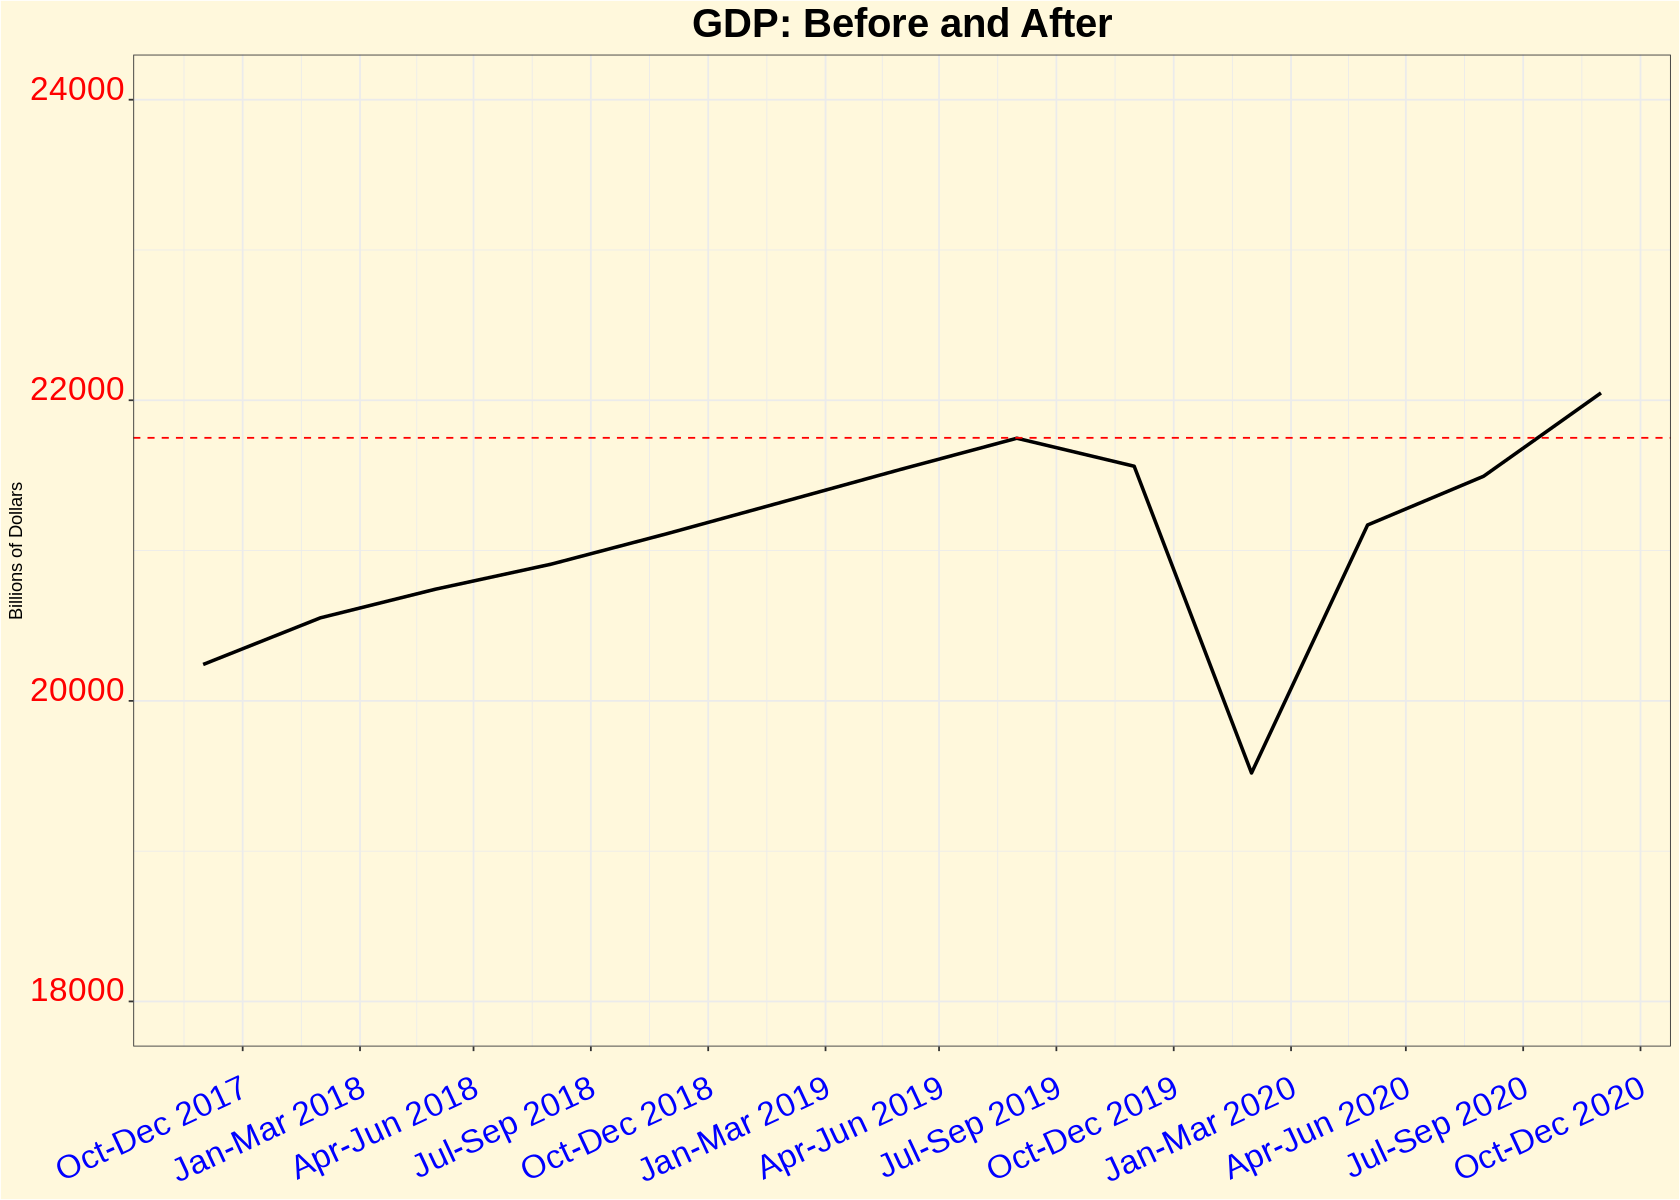

In [63]:
Cornsilk <-ggplot(GDP_4, aes(x = make_date(Date_Qtr), y = GDP)) + 
  geom_line(color = 'black', size=1) +
  scale_y_continuous("Billions of Dollars", 
                     limits=c(18000,24000)) +
  scale_x_date("",
                     breaks = date_breaks("3 months"),
                     labels = format_quarters) +
  theme_bw() + 
  theme(axis.text.x = element_text(color = 'blue' ,size= 20,angle= 25
  , vjust = 0.8 ,hjust = 1),
        legend.title=element_blank(),
        legend.position = c(.4, 1) ,
        axis.text.y = element_text(color = "red", size = 20, angle = 0, hjust = 1, vjust = 0, face = "plain"),  
        )+
        
                  theme(plot.background = element_rect(fill = "cornsilk"),
                      panel.background = element_rect(fill = "cornsilk"))+
        geom_hline(yintercept=21750, linetype="dashed", color = "red")+
        labs(title = "GDP: Before and After")+
  theme(plot.title = element_text(color = "black", size = 24, hjust = 0.5,lineheight = 0.9, face = "bold"))
Cornsilk

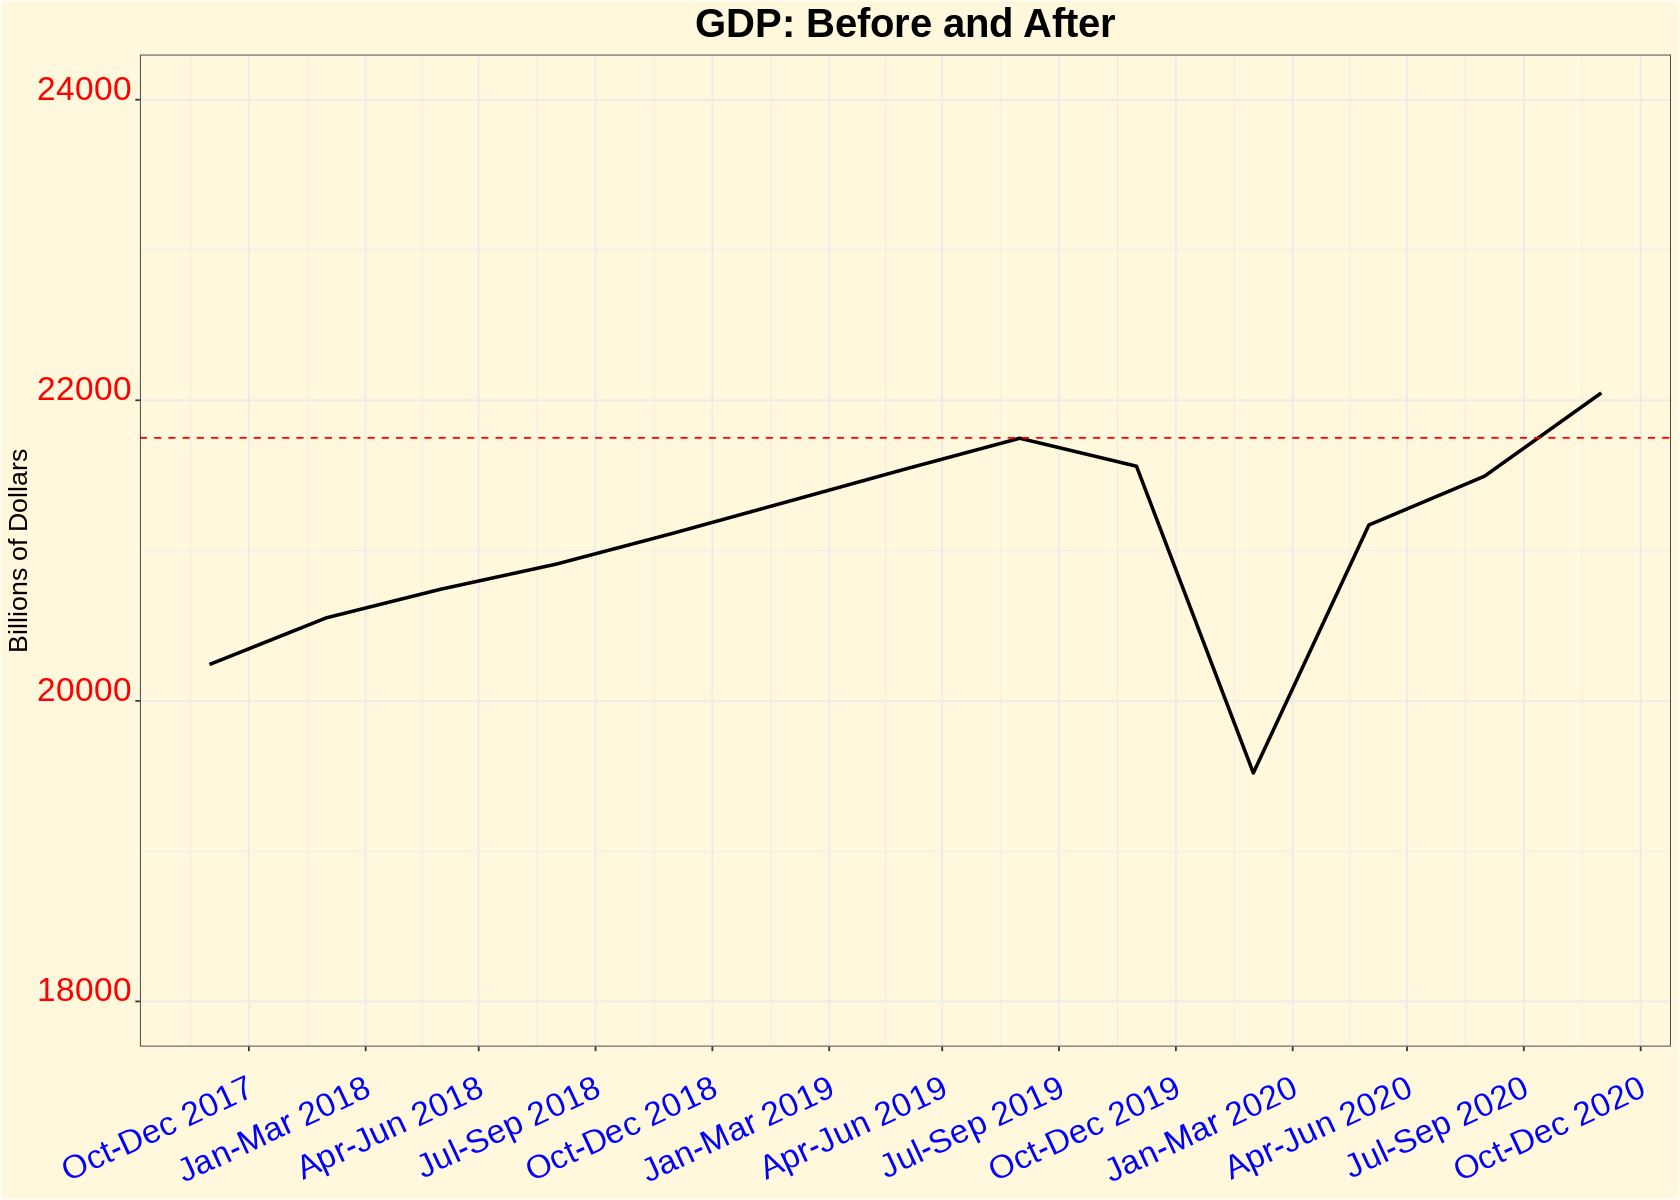

In [67]:
Cornsilk_2 <-ggplot(GDP_4, aes(x = make_date(Date_Qtr), y = GDP)) + 
  geom_line(color = 'black', size=1) +
  scale_y_continuous("Billions of Dollars", 
                     limits=c(18000,24000)) +
  scale_x_date("",
                     breaks = date_breaks("3 months"),
                     labels = format_quarters) +
  theme_bw() + 
  theme(axis.text.x = element_text(color = 'blue' ,size= 20,angle= 25
  , vjust = 0.8 ,hjust = 1),
        legend.title=element_blank(),
        legend.position = c(.4, 1) ,
        axis.text.y = element_text(color = "red", size = 20, angle = 0, hjust = 1, vjust = 0, face = "plain"),  
        )+
        
                  theme(plot.background = element_rect(fill = "cornsilk"),
                      panel.background = element_rect(fill = "cornsilk"),
                      axis.title.y = element_text(size = 16))+
        geom_hline(yintercept=21750, linetype="dashed", color = "red")+
        labs(title = "GDP: Before and After")+
  theme(plot.title = element_text(color = "black", size = 24, hjust = 0.5,lineheight = 0.9, face = "bold"))
Cornsilk_2

# GDP China and US Multiline Graph

Plot inside Plot

Main graph is US and China GDP, inset graph gdp/pp

Graph idea plot google search data from before 2008 for bankruptcy.

## Import Data

In [82]:
A <- read.csv("/content/GDP_China_US_2.csv")
head(A)

,Year,GDP_US,GDP_China,US_GDP_PP,China_GDP_PP,US_Growth,China_Growth
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,2019,"21,433.20","14,279.90","65,298","10,217",2.161,5.950
2,2018,"20,580.20","13,894.80","62,996","9,977",2.927,6.750
3,2017,"19,519.40","12,310.40","60,062","8,879",2.370,6.947
4,2016,"18,715.00","11,233.30","57,952","8,148",1.638,6.849
5,2015,"18,224.70","11,061.60","56,839","8,067",2.908,7.041
6,2014,"17,527.20","10,475.70","55,065","7,679",2.526,7.426


## Wrangel data

In [83]:
# remove commas
A$GDP_US <- as.numeric(gsub(",","",A$GDP_US))
A$GDP_China <- as.numeric(gsub(",","",A$GDP_China ))
A$US_GDP_PP <- as.numeric(gsub(",","",A$US_GDP_PP ))
A$China_GDP_PP <- as.numeric(gsub(",","",A$China_GDP_PP ))


In [84]:
head(A, 3)

,Year,GDP_US,GDP_China,US_GDP_PP,China_GDP_PP,US_Growth,China_Growth
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019,21433.2,14279.9,65298,10217,2.161,5.950
2,2018,20580.2,13894.8,62996,9977,2.927,6.750
3,2017,19519.4,12310.4,60062,8879,2.370,6.947


# Plot US & China GDP

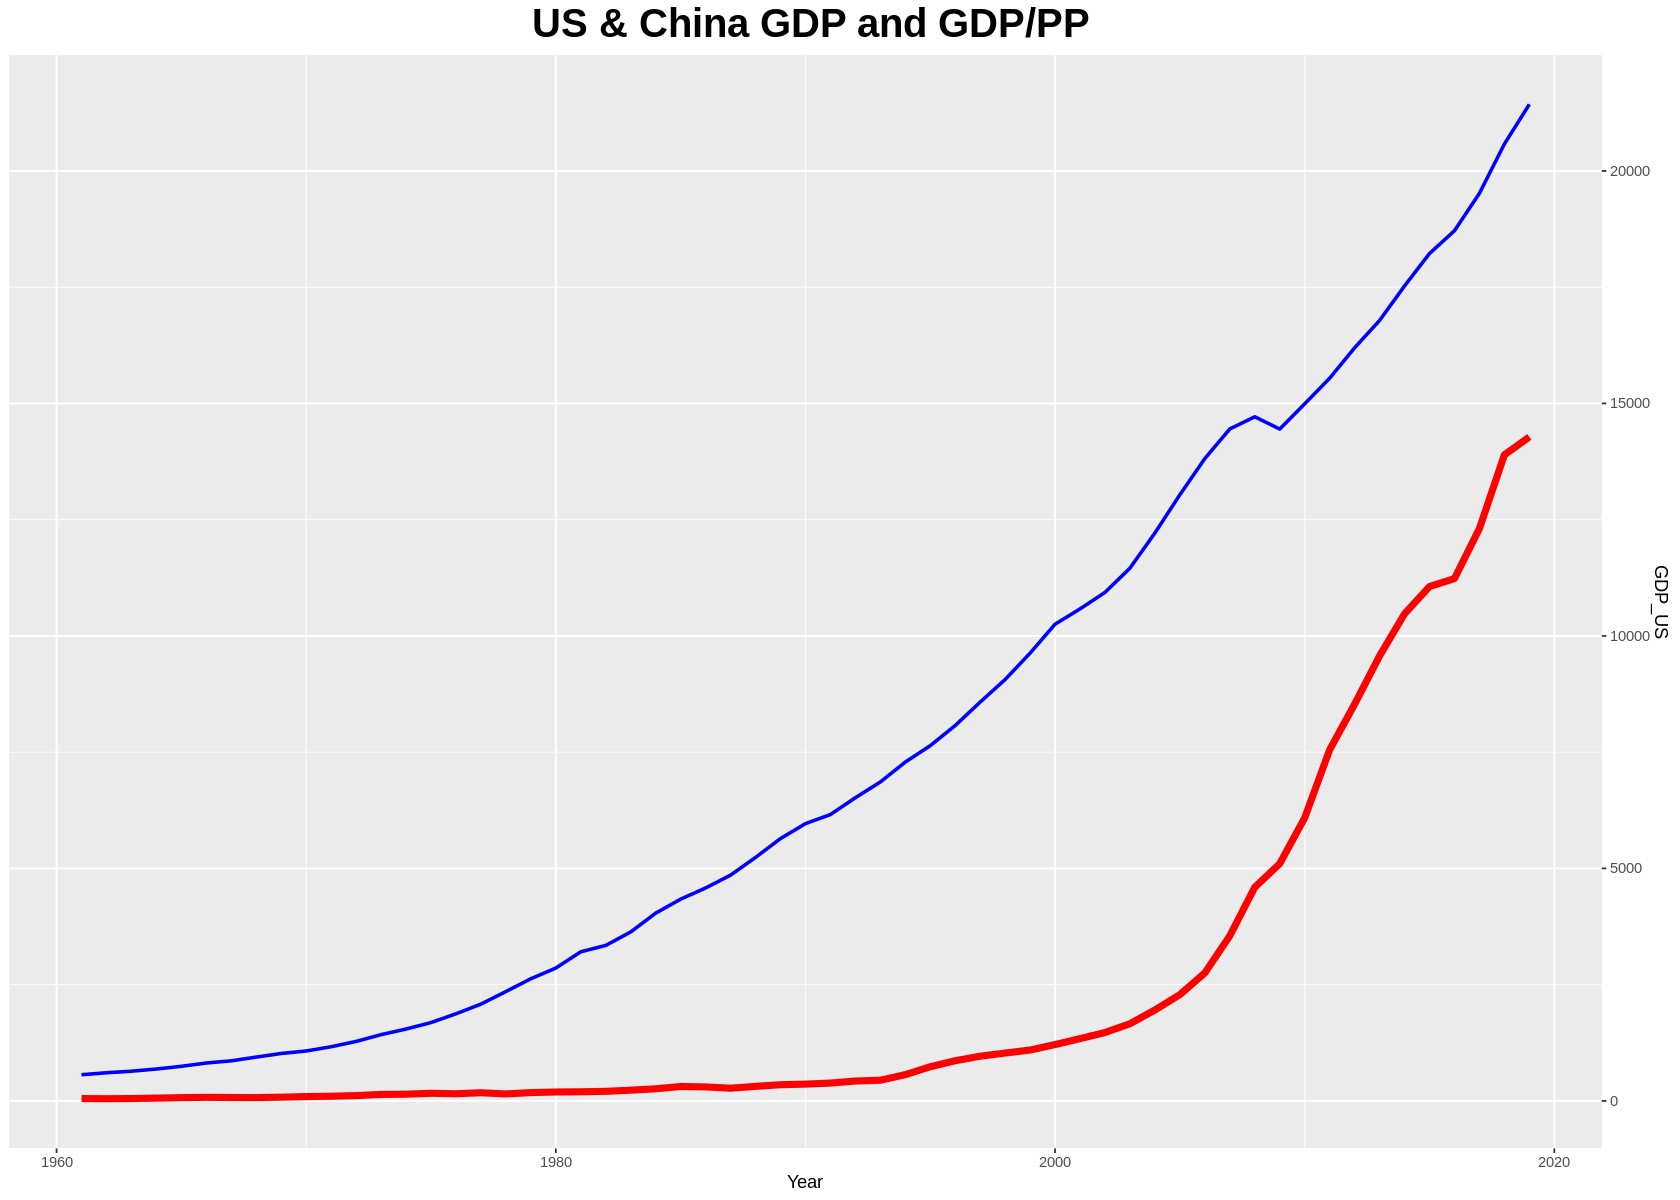

In [106]:
Plot_1 <- ggplot(A, aes(x= Year))+

        geom_line(aes(y = GDP_US) , color = 'blue', size = 1 )+
        geom_line(aes(y = GDP_China) , color = 'red', size = 2)+
        labs(
          title = " US & China GDP and GDP/PP")+
        theme(plot.title = element_text(color = "black", size = 24, hjust = 0.5,lineheight = 0.9, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5,size = 18))+
        scale_y_continuous(position = "right")
       

        
Plot_1

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



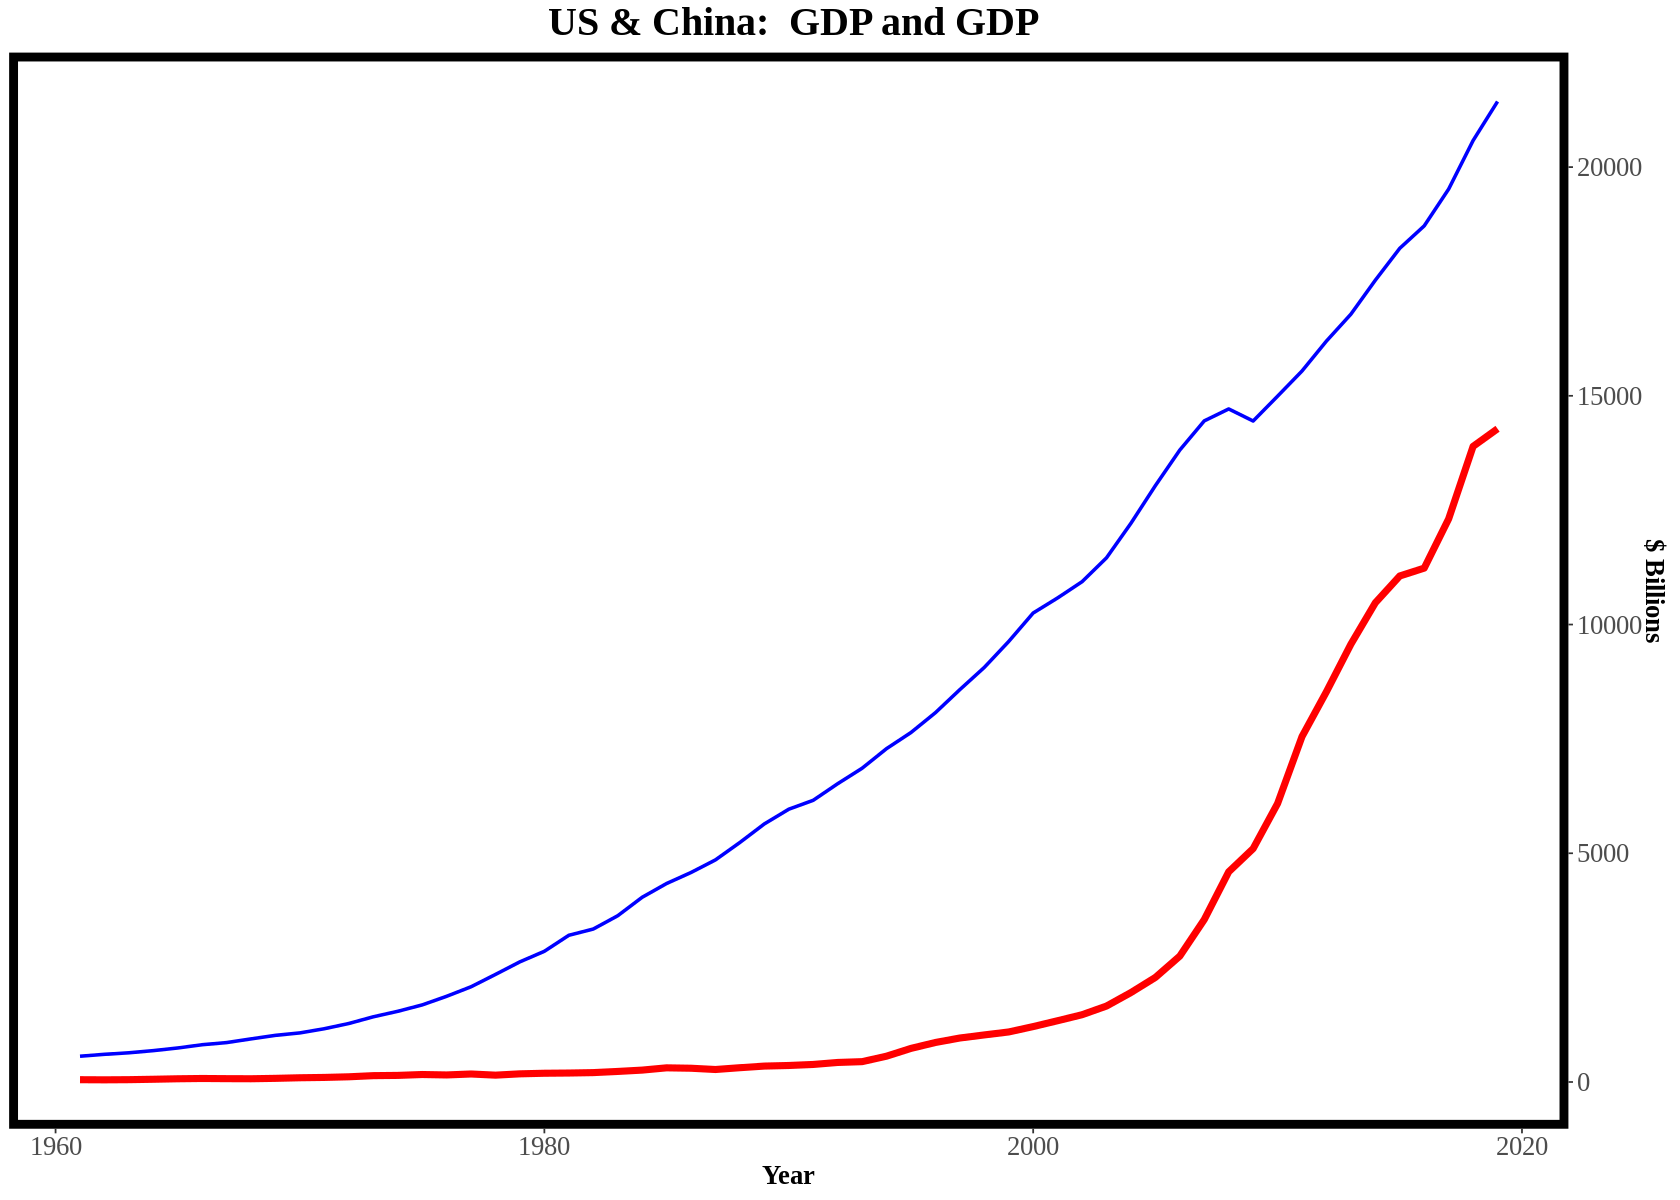

In [141]:
Plot_2 <- ggplot(A, aes(x= Year))+

        geom_line(aes(y = GDP_US) , color = 'blue', size = 1 )+
        geom_line(aes(y = GDP_China) , color = 'red', size = 2)+
        labs(
          title = " US & China:  GDP and GDP")+
        theme(plot.title = element_text(color = "black", size = 24, hjust = 0.5,lineheight = 0.9, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5,size = 18))+
        scale_y_continuous(position = "right")+
        theme_tufte()+
        labs(y= '$ Billions' ) +
        theme(axis.text=element_text(size=16),
              axis.title=element_text(size=16,face="bold"))+
         theme(plot.title = element_text(color = "black", size = 24, hjust = 0.5,lineheight = 0.9, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5,size = 18))+
        scale_y_continuous(position = "right") +
        theme( panel.border = element_rect(colour = "black", fill=NA, size=5))
        
        
        
Plot_2

In [136]:
#### Repsective GDP/PP. ###############

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



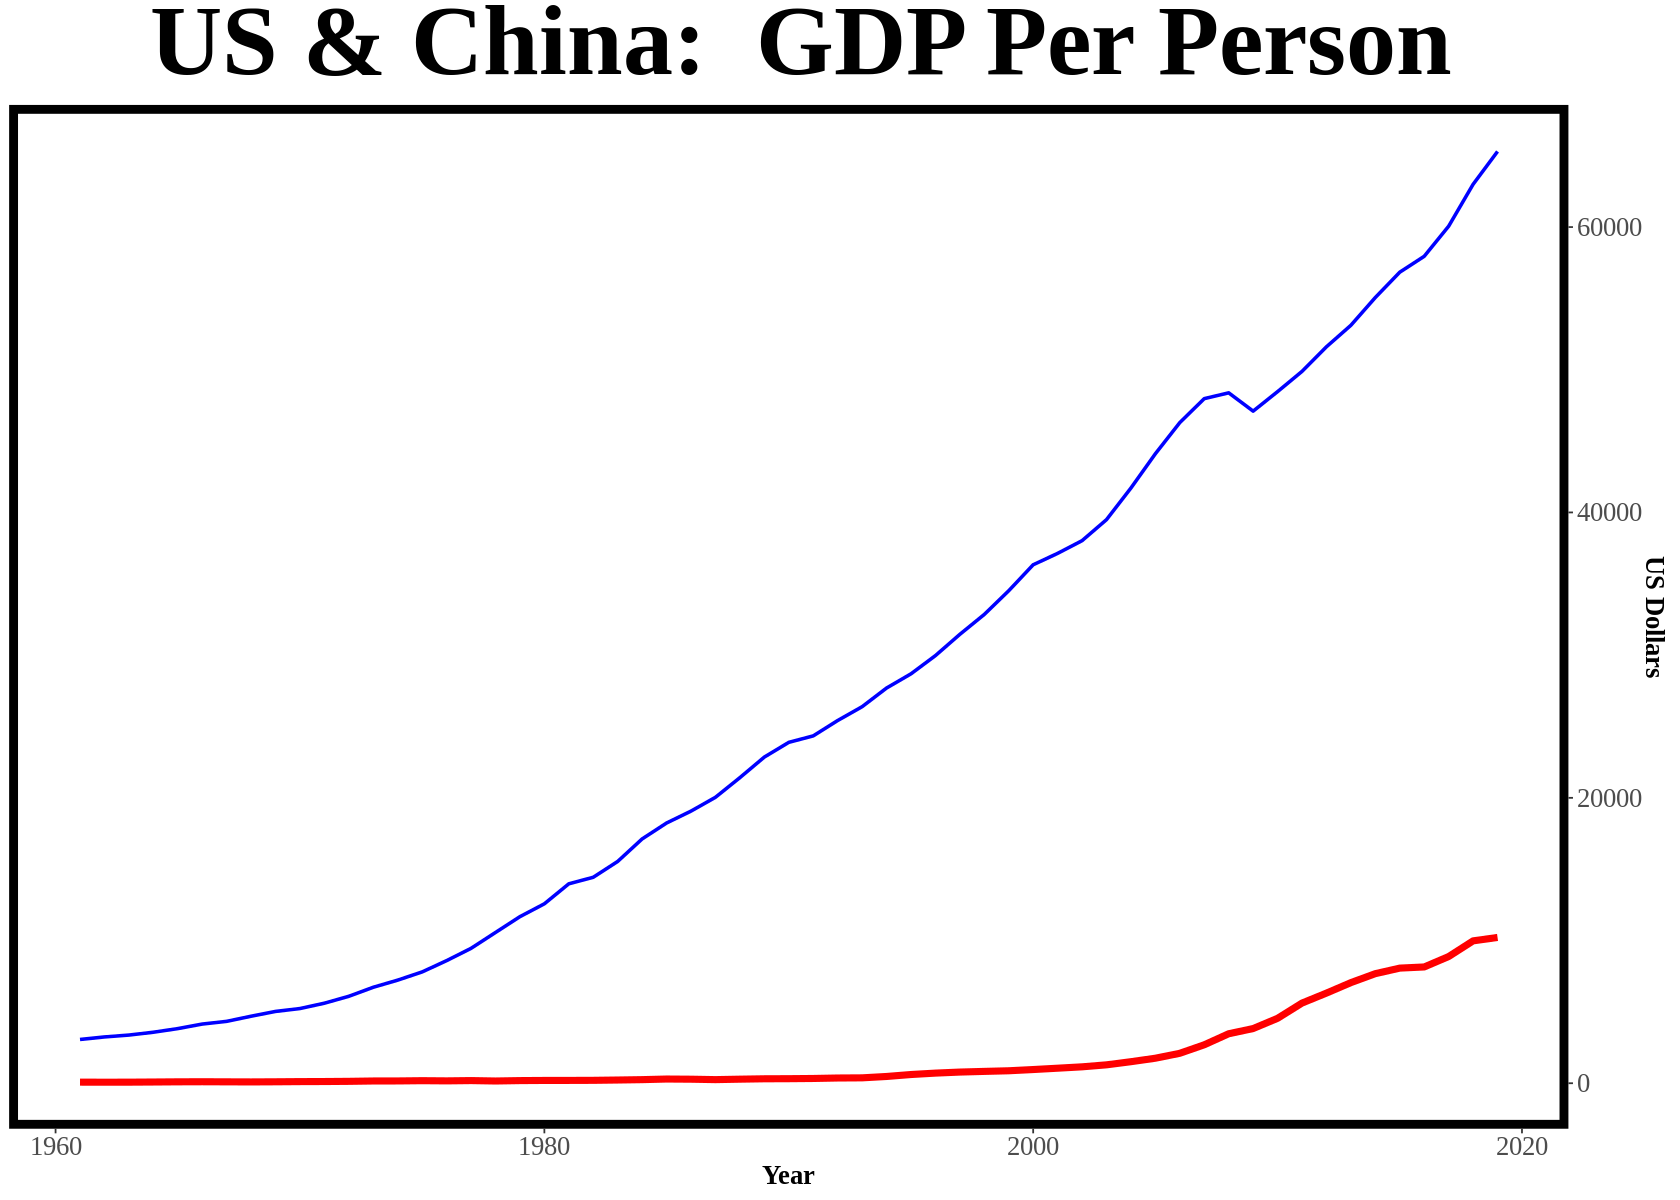

In [143]:
GDP_PP_plot <- ggplot(A, aes(x= Year))+

        geom_line(aes(y = US_GDP_PP) , color = 'blue', size = 1 )+
        geom_line(aes(y = China_GDP_PP) , color = 'red', size = 2)+
        labs(
          title = " US & China:  GDP Per Person")+
        theme(plot.title = element_text(color = "black", size = 24, hjust = 0.5,lineheight = 0.9, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5,size = 18))+
        scale_y_continuous(position = "right")+
        theme_tufte()+
        labs(y= 'US Dollars' ) +
        theme(axis.text=element_text(size=16),
              axis.title=element_text(size=16,face="bold"))+
         theme(plot.title = element_text(color = "black", size = 60, hjust = 0.5,lineheight = 0.9, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5,size = 18))+
        scale_y_continuous(position = "right")+
        theme( panel.border = element_rect(colour = "black", fill=NA, size=5))
        
        
        
GDP_PP_plot

# Plot within plot

In [ ]:
# delete

#Plot_2 <- ggplot(A, aes(x= Year))+

        geom_line(aes(y = GDP_US) , color = 'blue', size = 1 )+
        geom_line(aes(y = GDP_China) , color = 'red', size = 2)+
        labs(
          title = " US & China:  GDP and GDP")+
        theme(plot.title = element_text(color = "black", size = 24, hjust = 0.5,lineheight = 0.9, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5,size = 18))+
        scale_y_continuous(position = "right")+
        theme_tufte()+
        labs(y= '$ Billions' ) +
        theme(axis.text=element_text(size=16),
              axis.title=element_text(size=16,face="bold"))+
         theme(plot.title = element_text(color = "black", size = 24, hjust = 0.5,lineheight = 0.9, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5,size = 18))+
        scale_y_continuous(position = "right")
        
        
        
Plot_2

In [ ]:
data.tb <- tibble(x = 2000, y=15000,
plot = list(Plot_2 +
                  theme_bw(8)))

ggplot((A, aes()))

# Divergent Bar Graph

In [173]:
Jobs_added <- read.csv("/content/Jobs_added - Sheet1.csv")
head(Jobs_added )

,Date,Change.in.Employment,Change_Full_Number,Group
,<chr>,<chr>,<int>,<int>
1,2020-01-01,315,315000,1
2,2020-02-01,289,289000,1
3,2020-03-01,"-1,683",-1683000,2
4,2020-04-01,"-20,679",-20679000,2
5,2020-05-01,"2,833",2833000,1
6,2020-06-01,"4,846",4846000,1


In [166]:
# convert to date 
# then extract year

In [177]:
# convert to Date type
Jobs_added$Date <- ymd(Jobs_added$Date)



In [179]:
head(Jobs_added )

,Date,Change.in.Employment,Change_Full_Number,Group
,<date>,<chr>,<int>,<int>
1,2020-01-01,315,315000,1
2,2020-02-01,289,289000,1
3,2020-03-01,"-1,683",-1683000,2
4,2020-04-01,"-20,679",-20679000,2
5,2020-05-01,"2,833",2833000,1
6,2020-06-01,"4,846",4846000,1


In [182]:
Jobs_added$Date_1 <- year(Jobs_added$Date)

In [183]:
head(Jobs_added )

,Date,Change.in.Employment,Change_Full_Number,Group,Date_1
,<date>,<chr>,<int>,<int>,<dbl>
1,2020-01-01,315,315000,1,2020
2,2020-02-01,289,289000,1,2020
3,2020-03-01,"-1,683",-1683000,2,2020
4,2020-04-01,"-20,679",-20679000,2,2020
5,2020-05-01,"2,833",2833000,1,2020
6,2020-06-01,"4,846",4846000,1,2020


In [ ]:
#next extract the Year into new col
#Jobs_added <- Jobs_added %>%
            mutate(Date = ymd(Date) , year= year(Jobs_added))

In [186]:
Jobs_added$Group <- as.factor(Jobs_added$Group )

In [187]:
head(Jobs_added,3)

,Date,Change.in.Employment,Change_Full_Number,Group,Date_1
,<date>,<chr>,<int>,<fct>,<dbl>
1,2020-01-01,315,315000,1,2020
2,2020-02-01,289,289000,1,2020
3,2020-03-01,"-1,683",-1683000,2,2020


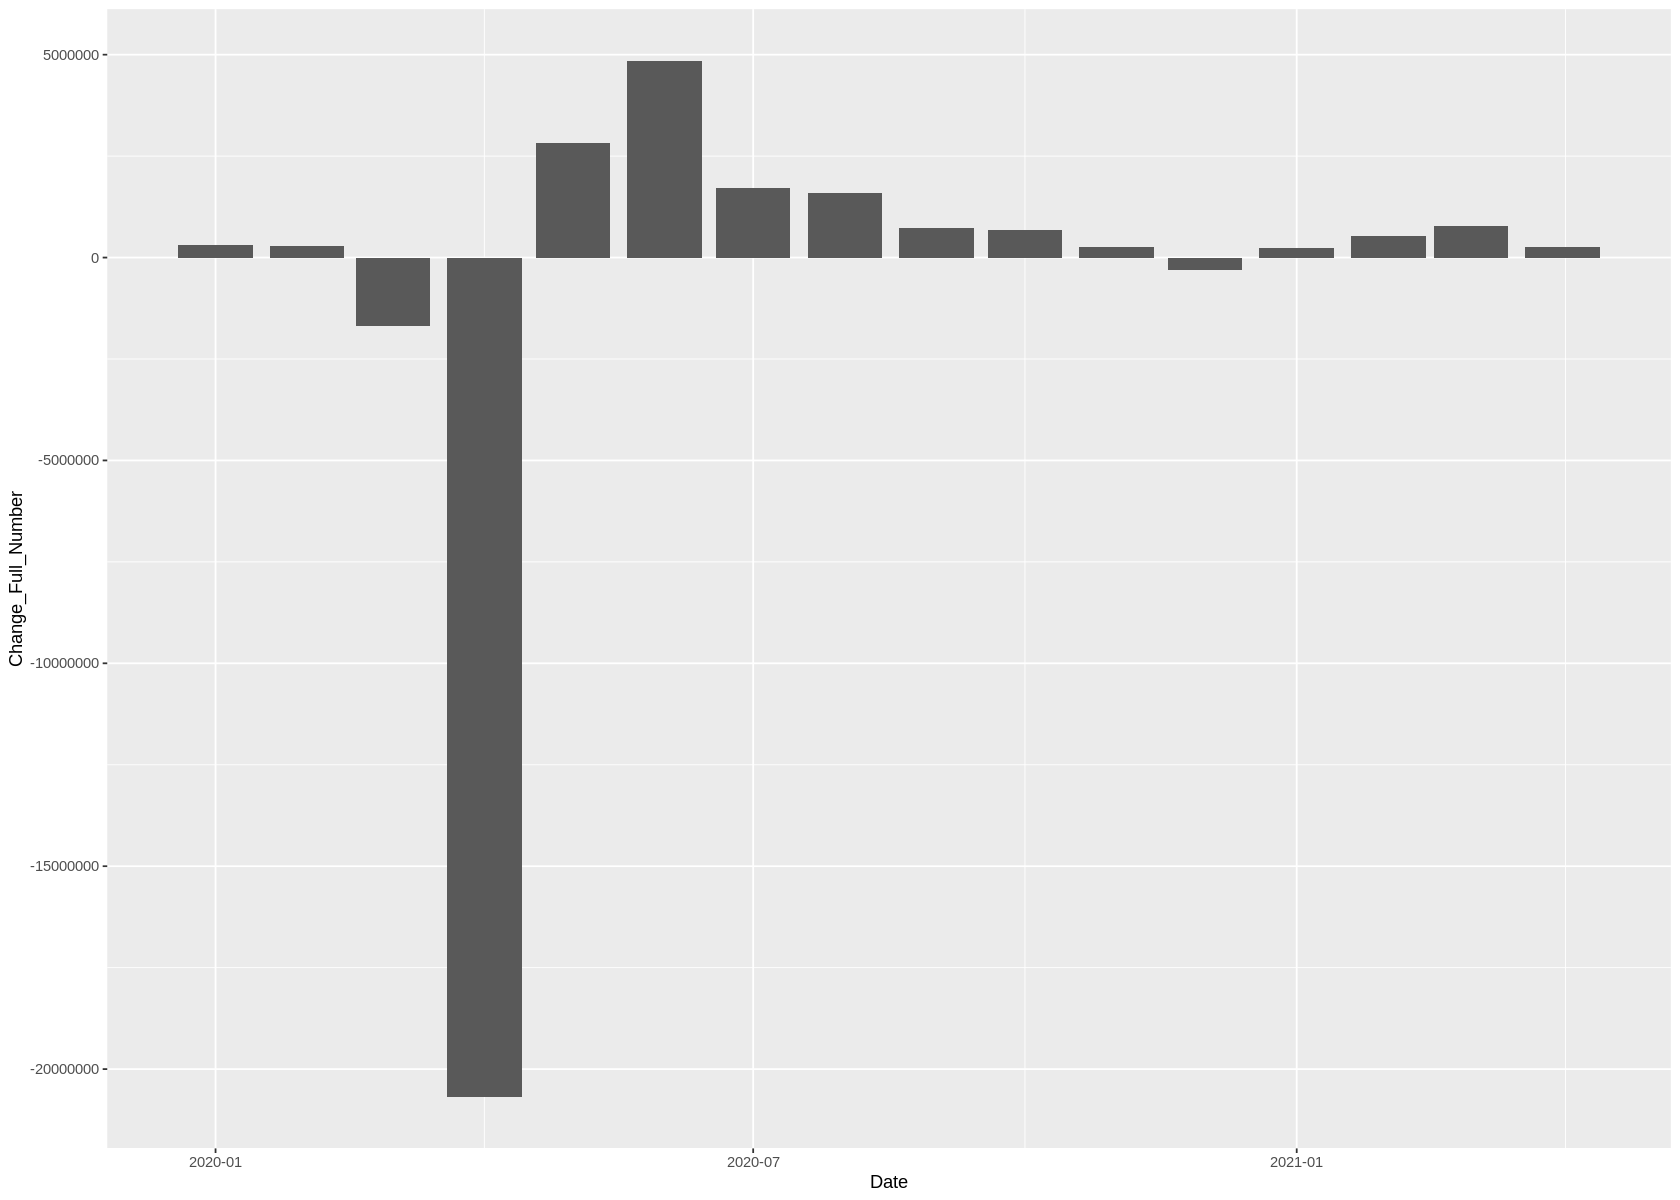

In [188]:
Bar_1 <- ggplot(data = Jobs_added, aes(x=Date, y= Change_Full_Number))+
geom_bar(stat="identity")
Bar_1

In [ ]:
#designate colors

$colors <- C('black','red')

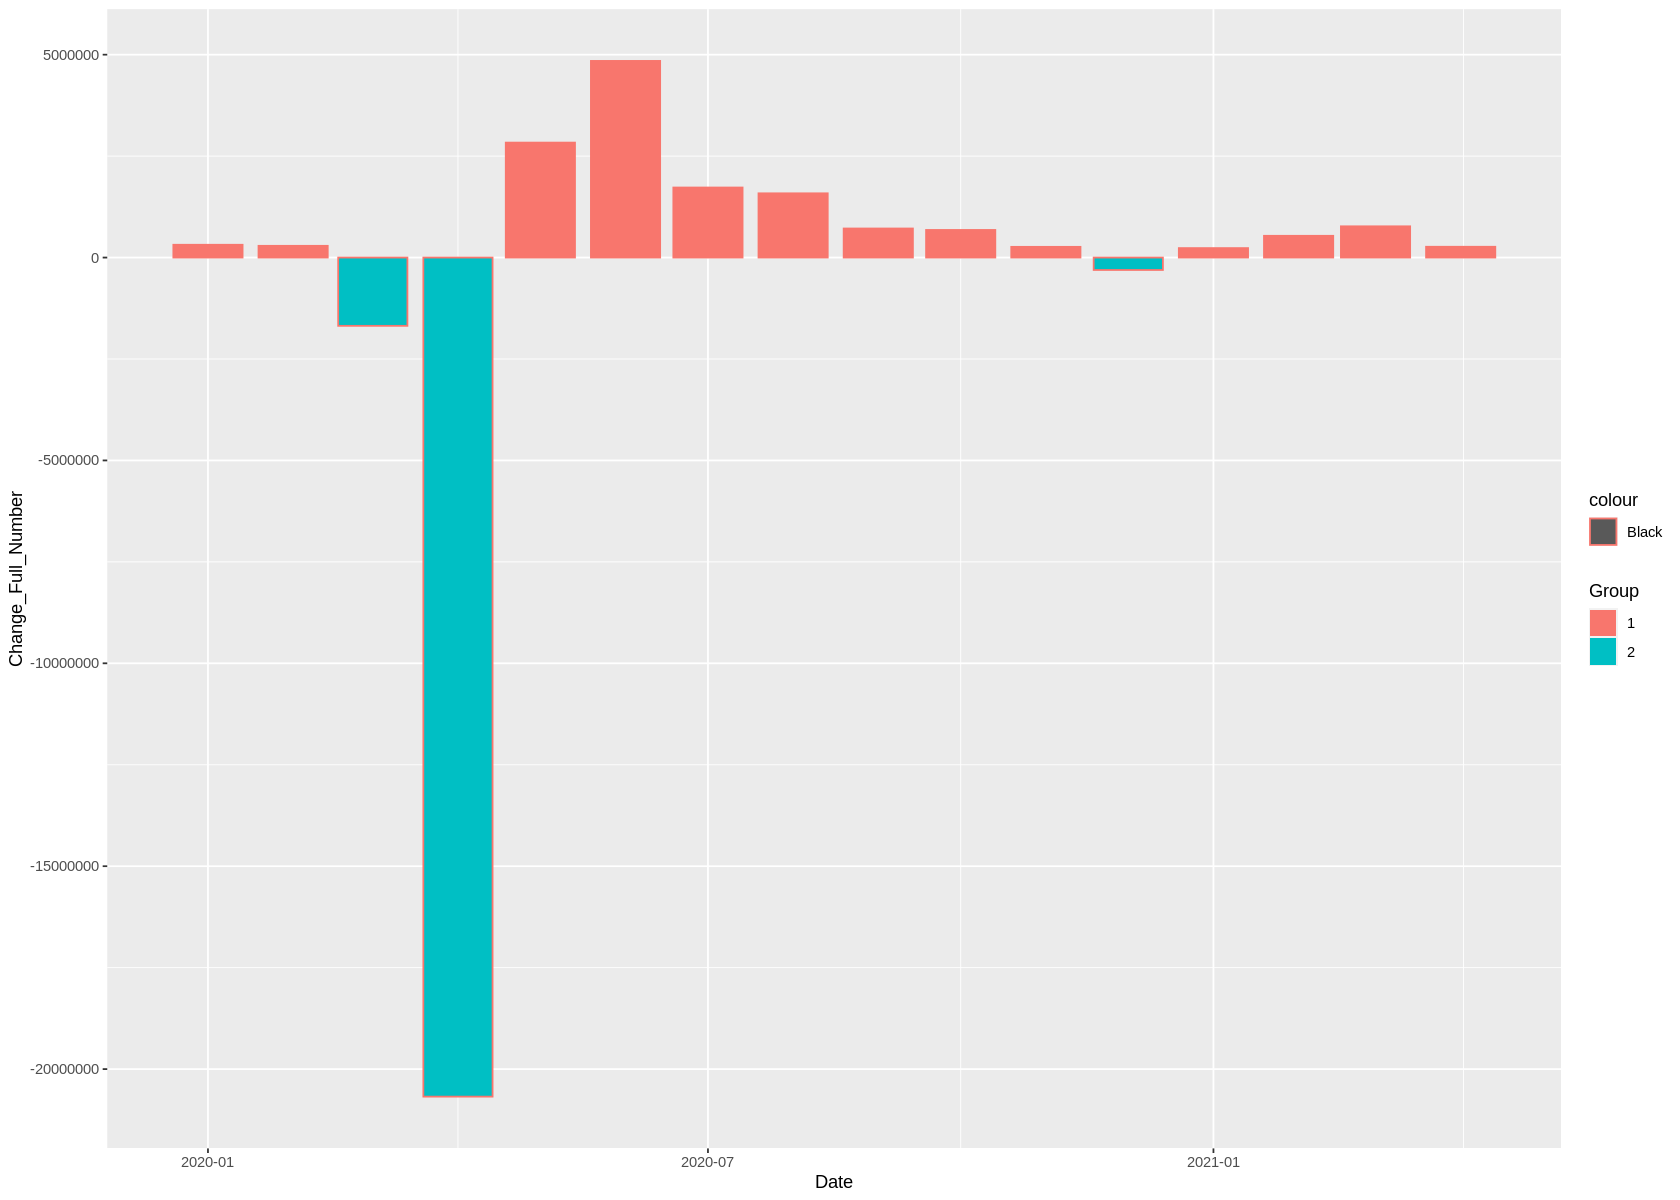

In [189]:
Bar_2 <- ggplot(data = Jobs_added, aes(x=Date, y= Change_Full_Number, color= 'Black', fill= Group))+
geom_bar(stat="identity")
Bar_2

In [199]:
cols <- c("1" = 'forestgreen', "2" = 'red')

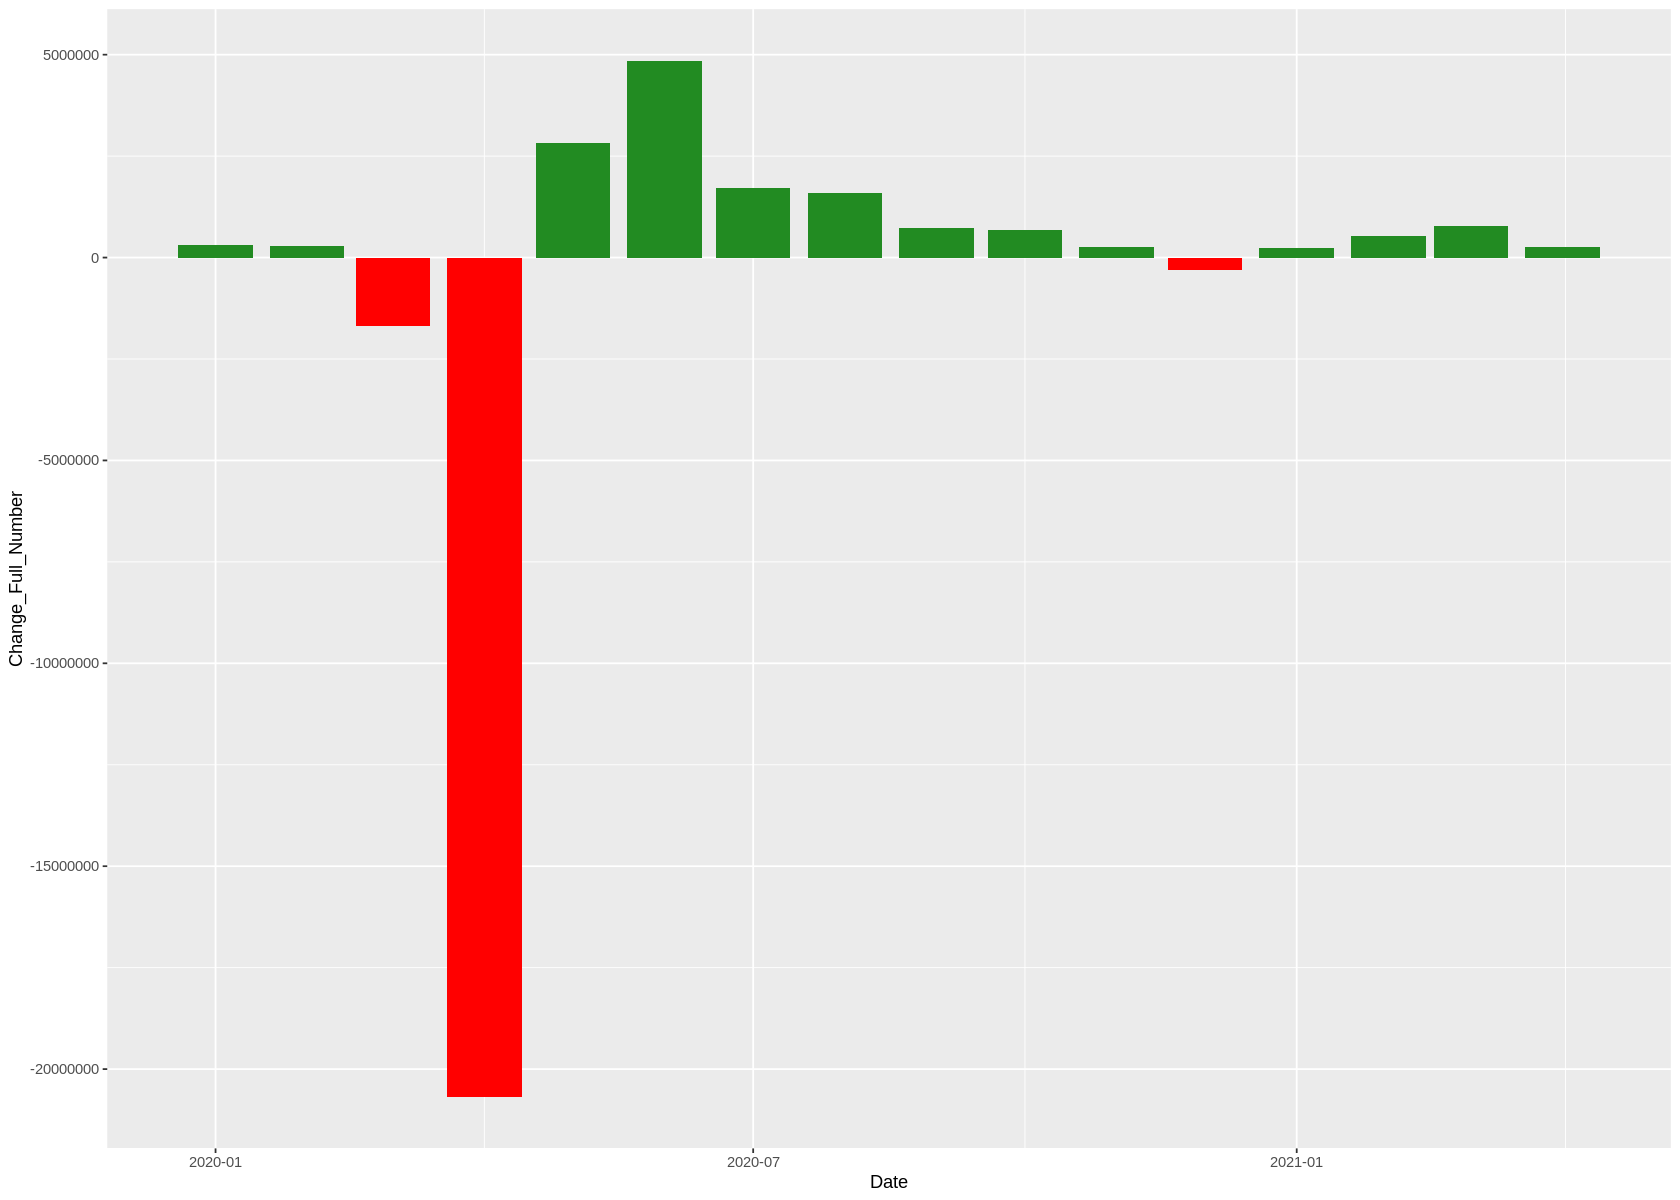

In [200]:
#https://stackoverflow.com/questions/38788357/change-bar-plot-colour-in-geom-bar-with-ggplot2-in-r



Bar_3 <- ggplot(data = Jobs_added, aes(x=Date, y= Change_Full_Number))+
geom_bar(aes(fill = Group) , stat="identity")+
  scale_fill_manual(values = cols,guide='none')
Bar_3

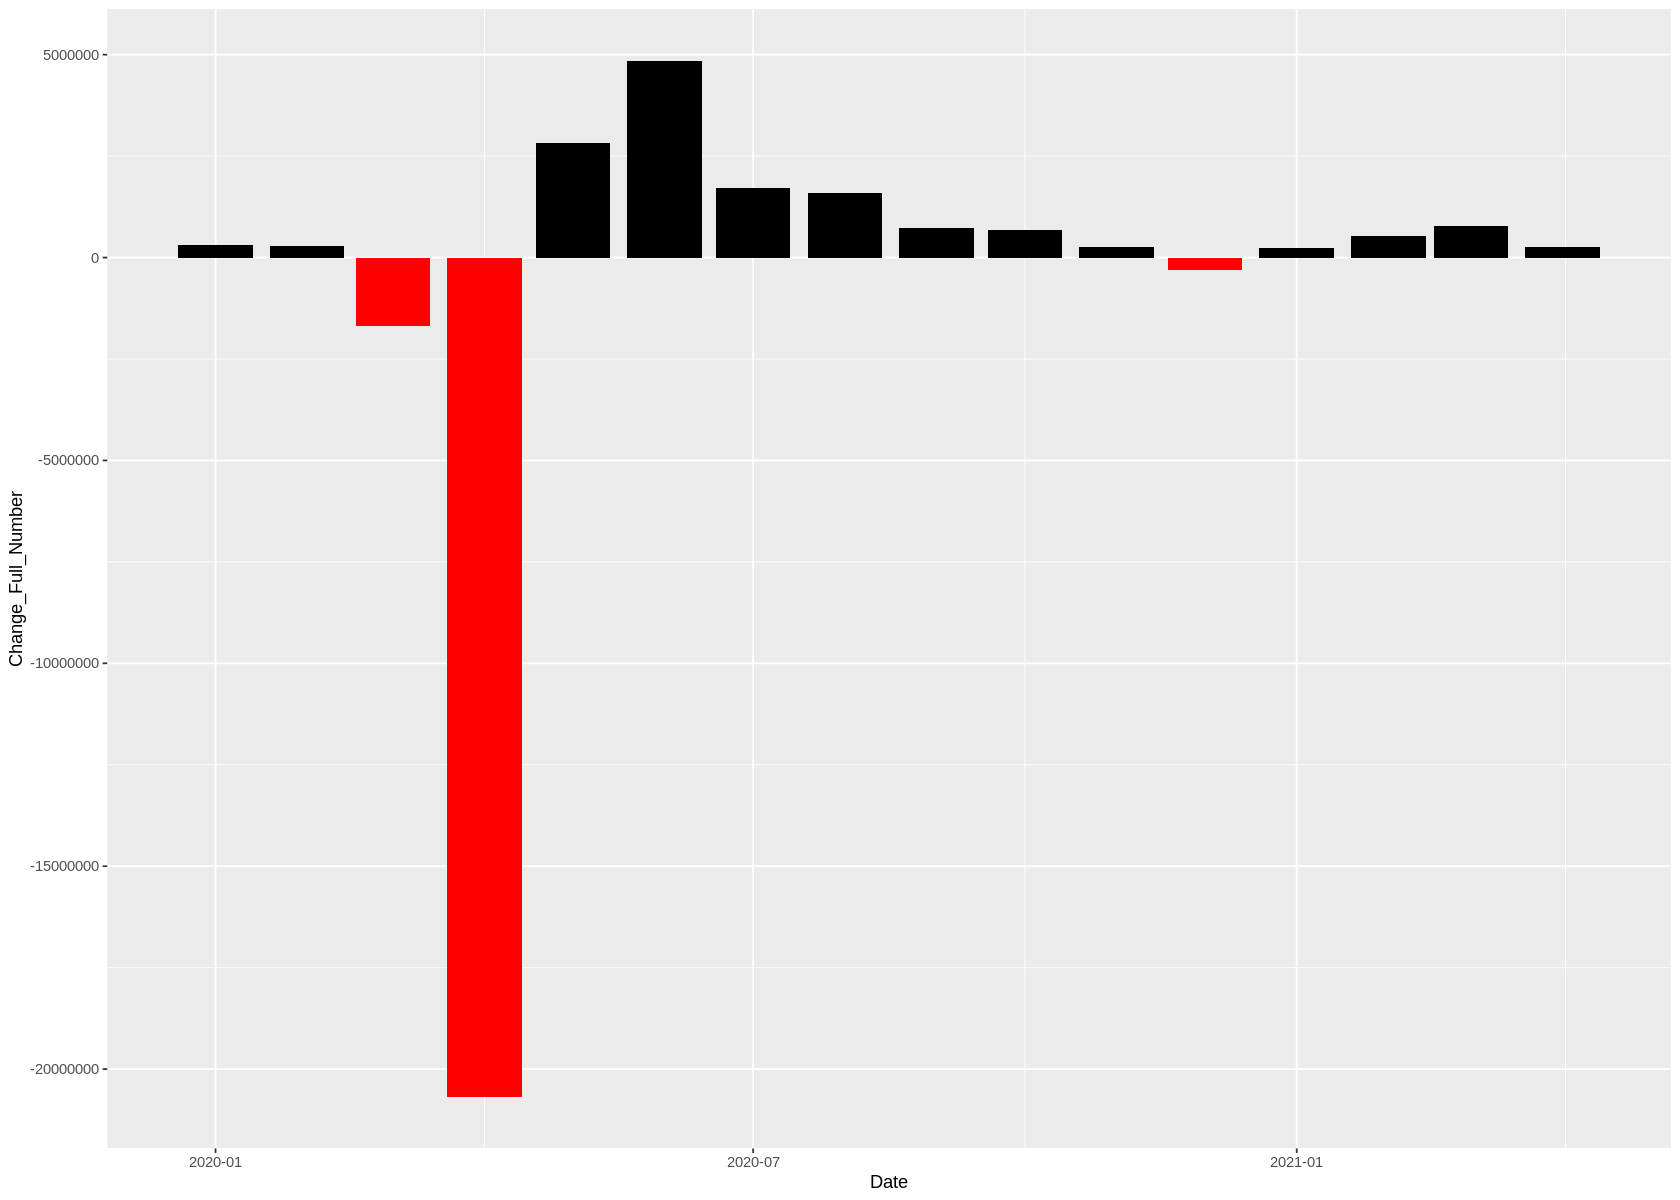

In [196]:
Bar_4 <- ggplot(data = Jobs_added, aes(x=Date, y= Change_Full_Number))+
geom_bar(aes(fill = Group) , stat="identity")+
  scale_fill_manual(values = cols,guide='none')
Bar_4

# Junk

In [19]:
dat = structure(list(Group = structure(c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 2L, 2L, 2L, 2L, 2L, 
2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L), .Label = c("TypeA", 
"TypeB"), class = "factor"), Date_Qtr = c(2011.1, 2011.2, 2011.3, 
2011.4, 2012.1, 2012.2, 2012.3, 2012.4, 2013.1, 2013.2, 2013.3, 
2013.4, 2014.1, 2014.2, 2014.3, 2014.4, 2015.1, 2015.2, 2011.1, 
2011.2, 2011.3, 2011.4, 2012.1, 2012.2, 2012.3, 2012.4, 2013.1, 
2013.2, 2013.3, 2013.4, 2014.1, 2014.2, 2014.3, 2014.4, 2015.1, 
2015.2), Counts = c(105L, 82L, 72L, 79L, 93L, 118L, 81L, 96L, 
84L, 83L, 84L, 81L, 99L, 103L, 111L, 80L, 127L, 107L, 54L, 51L, 
64L, 64L, 53L, 65L, 78L, 63L, 92L, 61L, 80L, 71L, 88L, 66L, 67L, 
57L, 75L, 59L)), .Names = c("Group", "Date_Qtr", "Counts"), class = "data.frame", row.names = c(NA, 
-36L))

In [ ]:
dat

In [21]:
library(ggplot2)
library(scales)
library(zoo)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




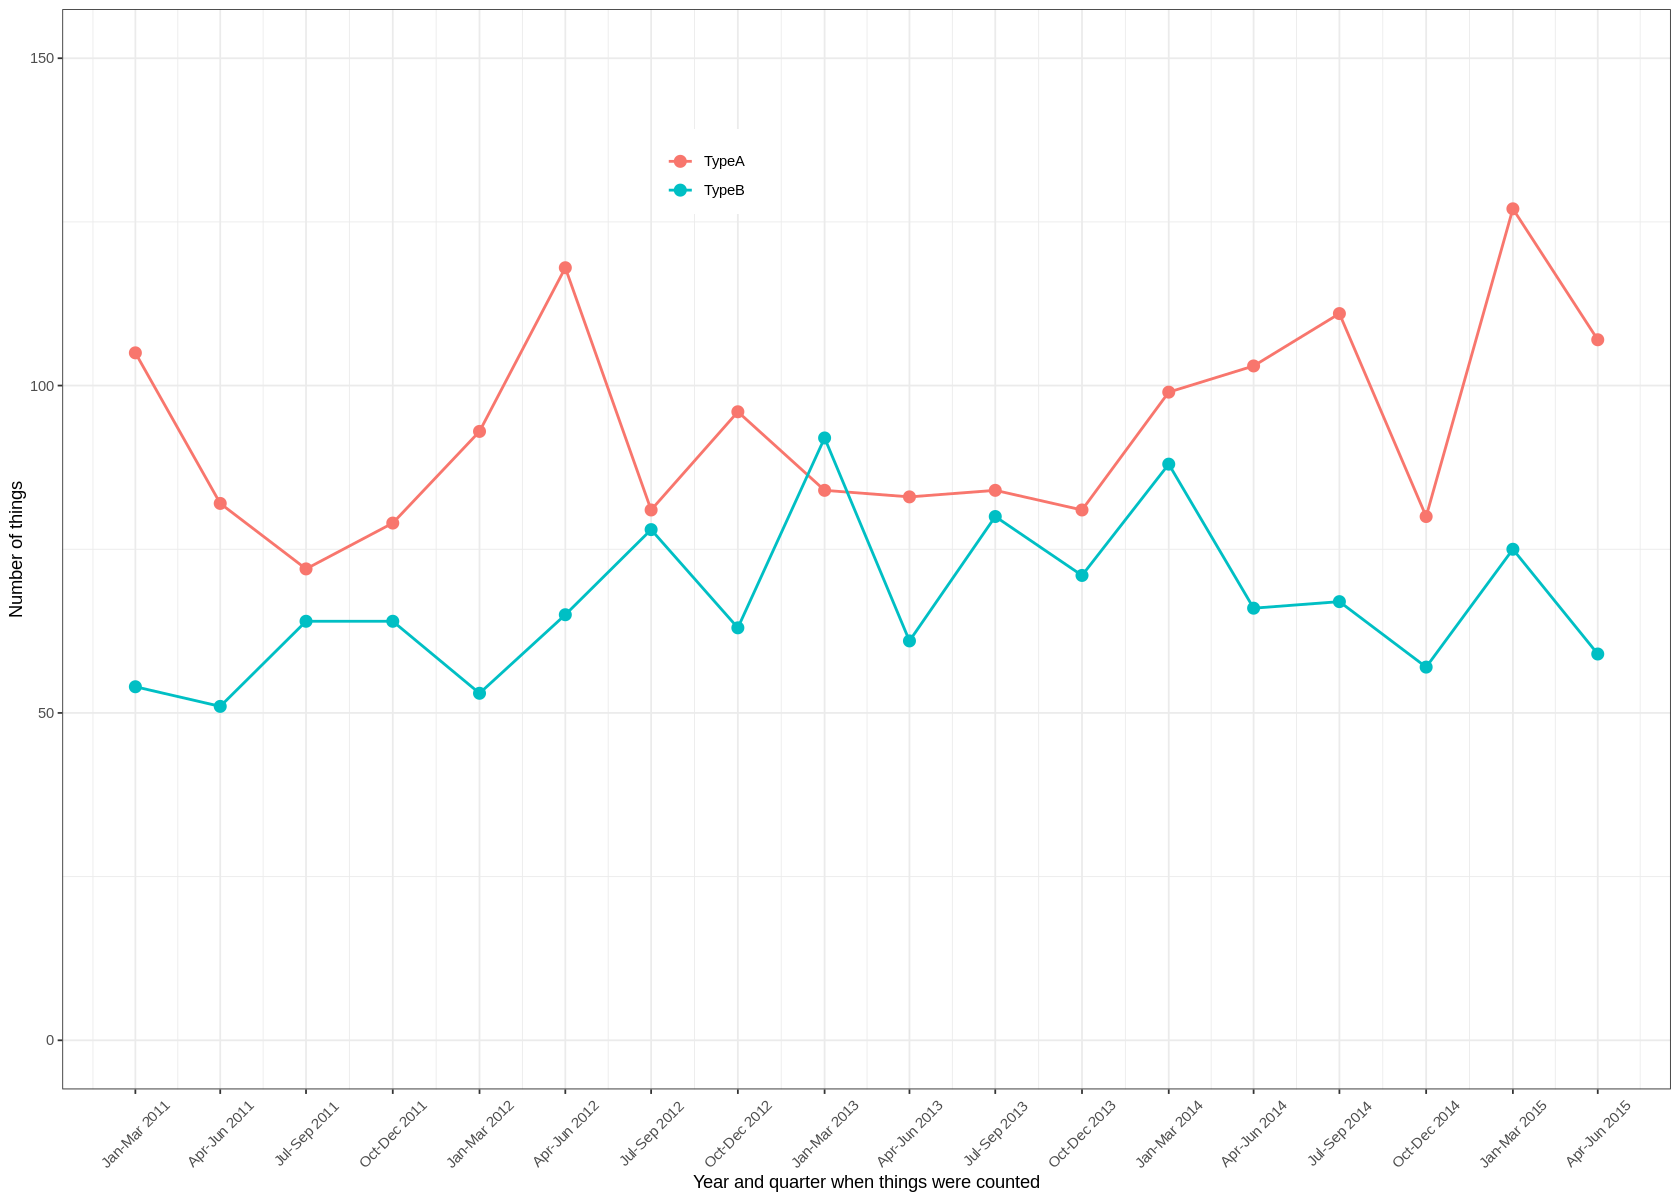

In [22]:
make_date <- function(x) {
  year <- floor(x)
  x <- year + (x - year)/0.4 - 0.125
  as.Date(as.yearqtr(x))
}

format_quarters <- function(x) {
  x <- as.yearqtr(x)
  year <- as.integer(x)
  quart <- as.integer(format(x, "%q"))

  paste(c("Jan-Mar","Apr-Jun","Jul-Sep","Oct-Dec")[quart], 
        year)
}


ggplot(dat, aes(x = make_date(Date_Qtr), y = Counts)) + 
  geom_point( aes( color = Group ), size=3) + 
  geom_line(aes(color = Group), size=0.8) +
  scale_y_continuous("Number of things", 
                     limits=c(0,150)) +
  scale_x_date("Year and quarter when things were counted",
                     breaks = date_breaks("3 months"),
                     labels = format_quarters) +
  theme_bw() + 
  theme(axis.text.x = element_text(angle=45, vjust = 0.5),
        legend.title=element_blank(),
        legend.position = c(.4,0.85))

In [ ]:
############


In [124]:
install.packages('ggpmisc')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘polynom’, ‘splus2R’, ‘plyr’, ‘xts’




In [125]:
library(tibble)
library(ggpmisc)


Attaching package: ‘ggpmisc’


The following object is masked from ‘package:ggplot2’:

    annotate




In [127]:
p <- ggplot(mpg, aes(factor(cyl), hwy, fill = factor(cyl))) +
  stat_summary(geom = "col", fun = mean, width = 2/3) +
  labs(x = "Number of cylinders", y = NULL, title = "Means") +
  scale_fill_discrete(guide = FALSE)

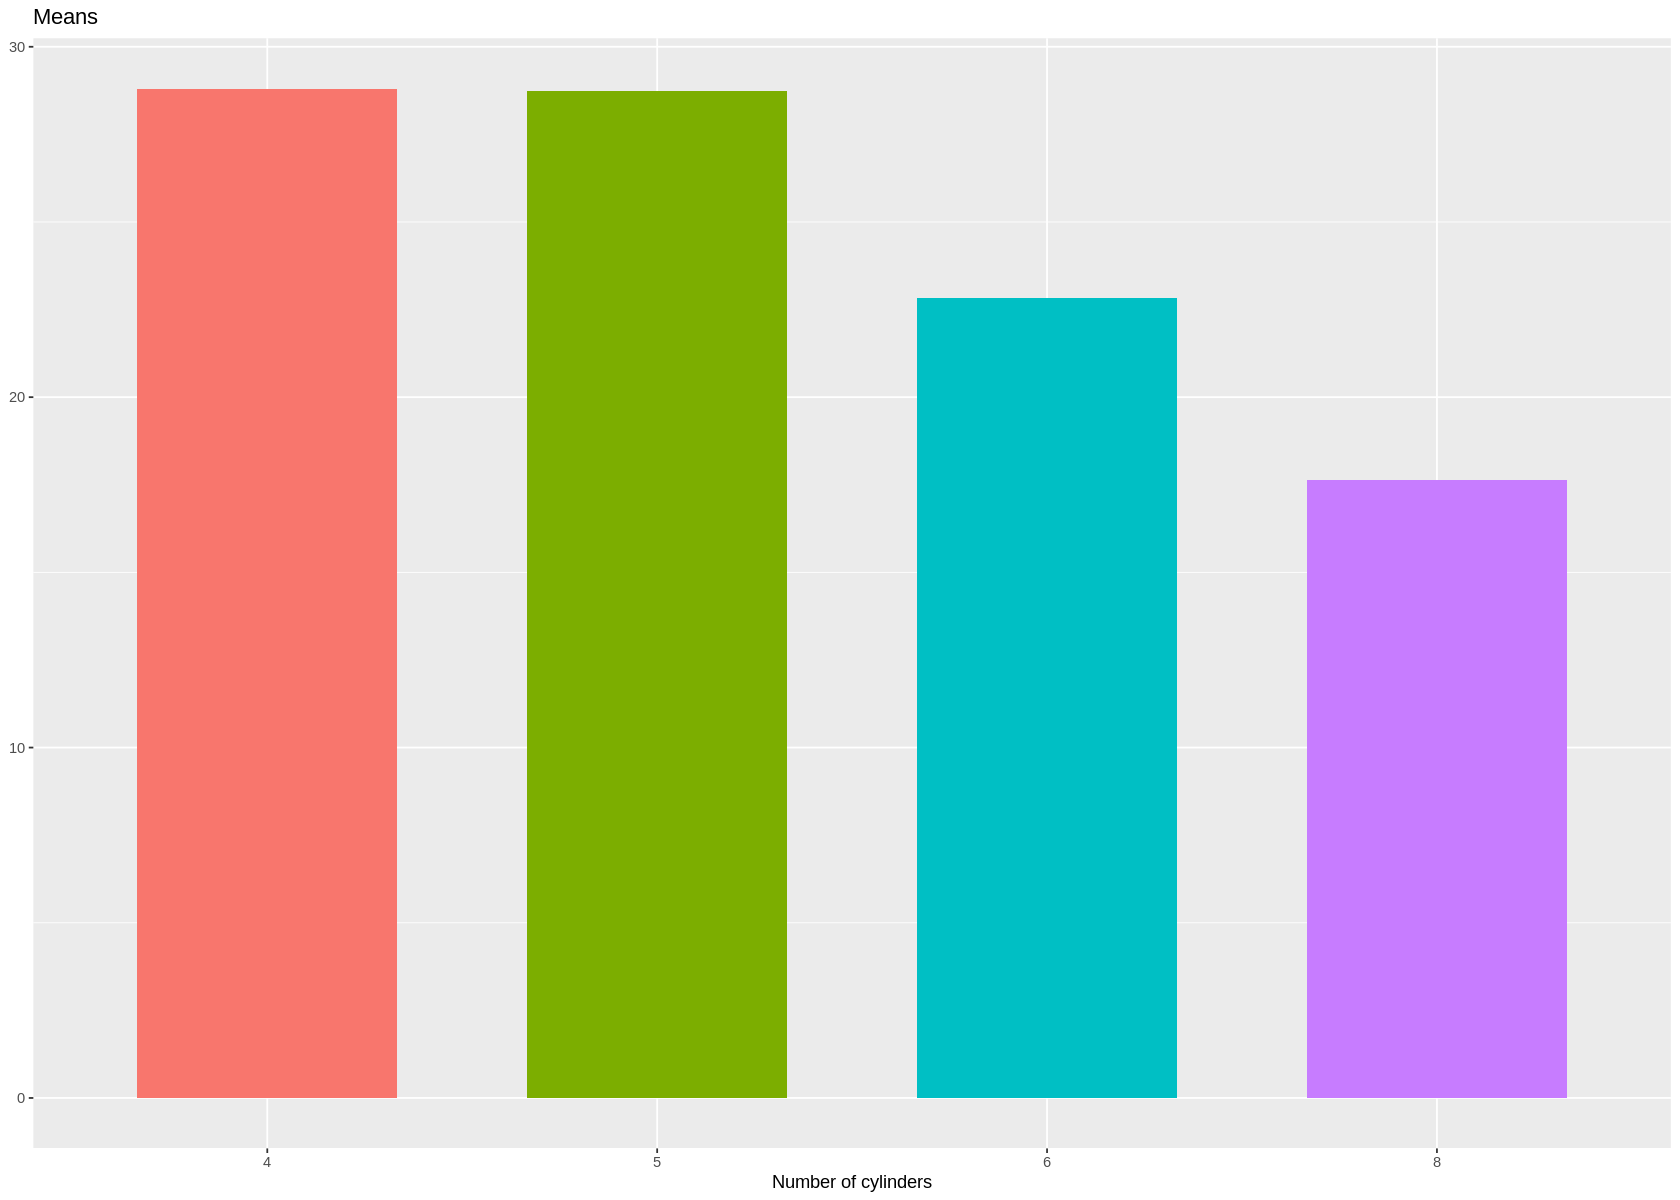

In [128]:
p

In [129]:
data.tb <- tibble(x = 7, y = 44, 
                  plot = list(p +
                                theme_bw(8)))

In [ ]:
data.tb

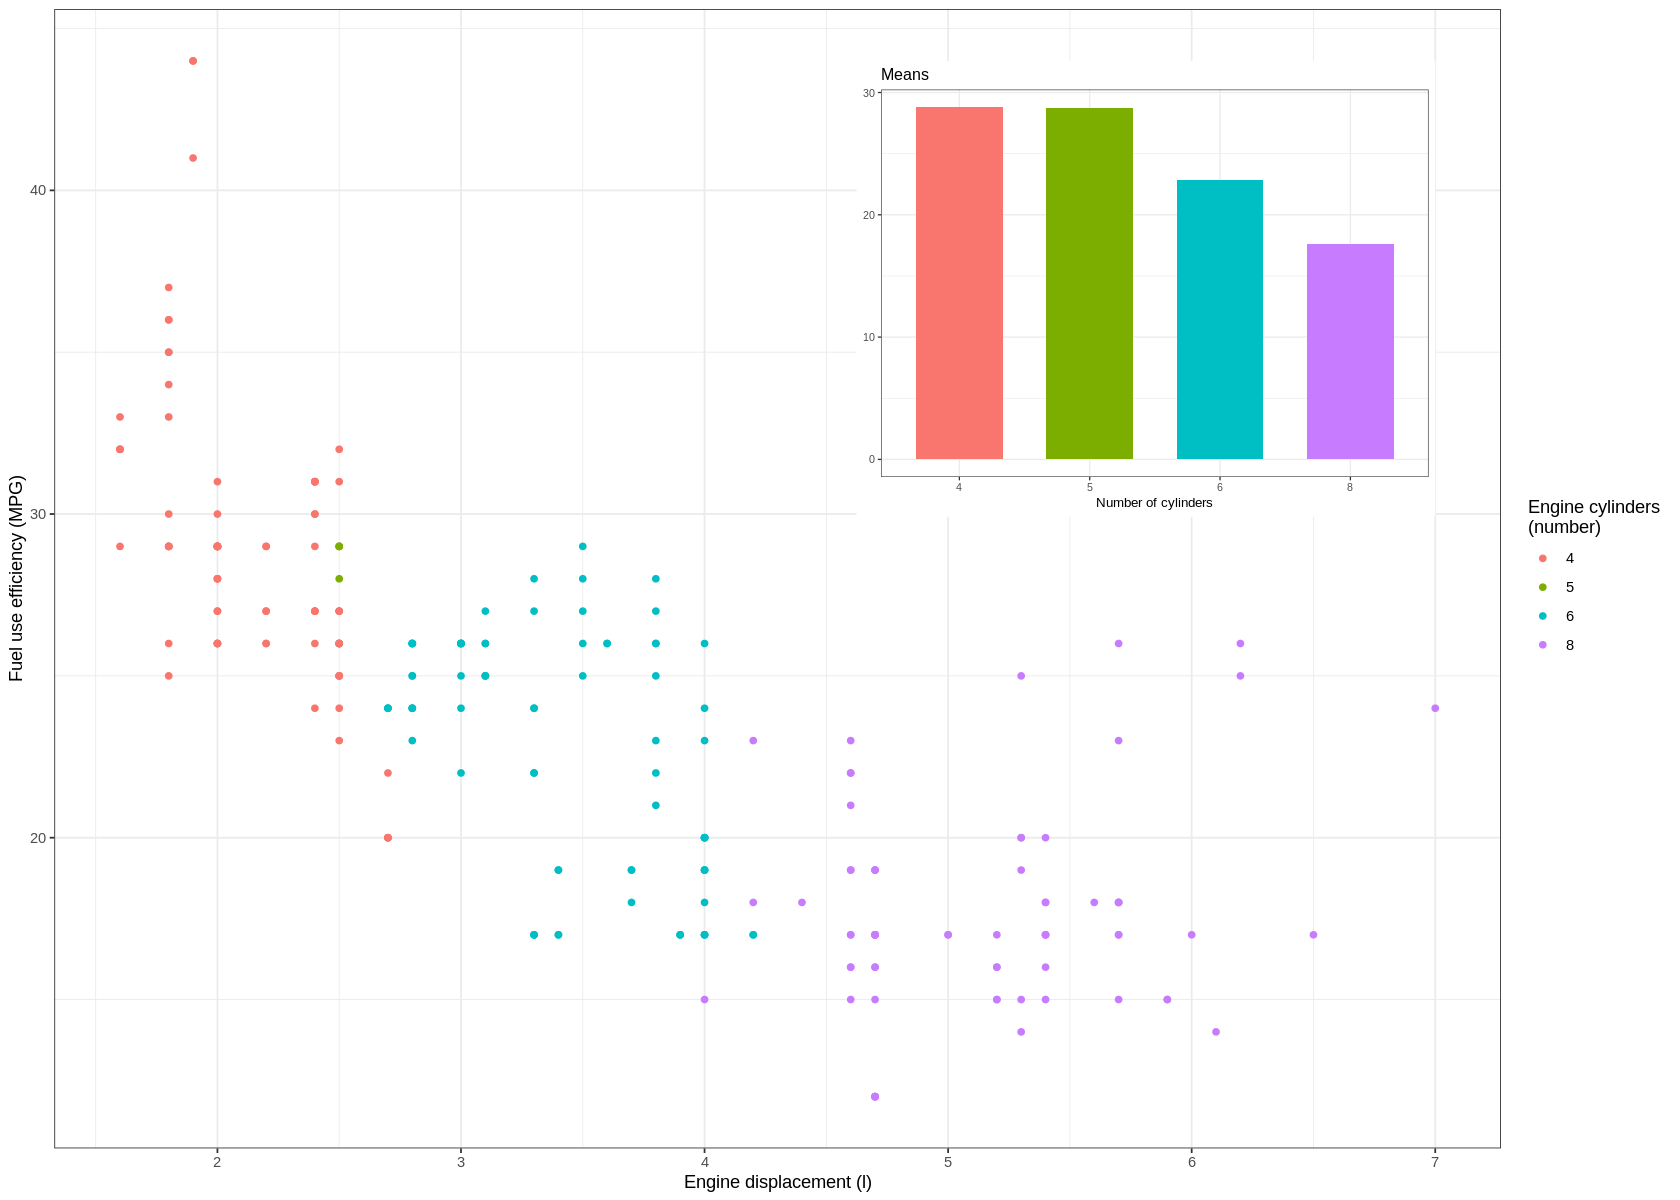

In [131]:
ggplot(mpg, aes(displ, hwy, colour = factor(cyl))) +
  geom_plot(data = data.tb, aes(x, y, label = plot)) +
  geom_point() +
  labs(x = "Engine displacement (l)", y = "Fuel use efficiency (MPG)",
       colour = "Engine cylinders\n(number)") +
  theme_bw()